# Project 2:  Ames Housing Data and Kaggle Challenge

Kelly Slatery | US-DSI-10 | 01.17.2020

## Problem Statement

Real estate and property appraisal are fields based on expertise knowledge. All existing Automated Valuation Models (AVMs) market themselves as a reference point, but advise home buyers and sellers to consult an agent for accurate, up-to-date property value estimates. While in the scope of this project, we are only looking at data for individual residential properties sold between 2006 and 2010 in the city of Ames, Iowa, most prominent AVMs estimate tens to hundreds of millions of home values in a wide range of cities around the U.S. or even the world. Considering the features that optimize sale price predictions on this dataset, what features most considerably impact sale price? What features would be useful to have here to make predictions for sale prices in Ames, Iowa? And, ultimately, just what makes for a good property value estimator?

## Executive Summary

In this project, we explore the Ames Housing Dataset, originally provided by the Ames Assessor’s Office. The original dataset contains 2051 observations and 81 columns containing variables describing features of residential properties sold in Ames, Iowa from 2006 to 2010. Based on extensive data cleaning, exploratory data analysis (EDA), and visualization, we will train, evaluate, and finetune various machine learning linear regression models to predict the price of a house for sale in the Ames Housing Market (between 2006-2010). 

Through initial exploration, it became clear that there were many erroneous data types and null values to be addressed. Upon cleaning the data, some major patterns emerged. The first was the strength of various measures of quality in predicting sale price. Our final model includes 6 features explicitly labeled as "quality" ('Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Fireplace Qu', 'Heating QC') as well as a feature labeled "condition" ('Garage Cond') and another feature with three possible appreciations ('Paved Drive'). A few models performed very highly on the train data, but were overfit and received low scores in Kaggle. Additionally, standardized linear regression, lasso, and ridge variants used with the final set of features chosen did not perform well, indicating that these features are most likely optimized for a linear regression model, but not necessarily the strongest predictors of price. Because the model chosen for evaluation in this model did not use standardized variables, the coefficients are not highly interpretable. However, through the process of model tuning and evaluation, I was able to draw insights into what makes for a good property value estimator.

After evaluating the data, features, limitations, and median error rate of four of the most popular AVMs on the market, it became clear that there are three major items that would enhance this model for the Ames Housing Market 2006-2010:

1. Better data (i.e. market conditions, location-specific criteria such as schools, crime rates, proximity to public transport and stores, etc.)
2. Neighborhood-specific models (all AVMs analyzed use some sort of model comparing house sale prices in similar areas and determining weight of different features based on location)
3. Expertise knowledge (as a data scientist, I can interpret the significance of the numbers and make inferences, but, as mentioned above, real estate and property appraisal are incredibly nuanced)

In addition, I make four recommendations going forward for anyone hoping to create an AVM / property value estimator, as illustrated in my process below:

1. Simplicity is key for generalization
2. Determine if outliers are part of “irreducible error” noise or the “Joe Biden Effect”
3. A good model starts with good data
4. In real estate, nuance is key

In conclusion, the models built in this notebook illustrate a process of data cleaning, EDA, data visualization, and model tuning that led me to draw the conlusions above. The final model that is used for comparison with larger AVMs uses 23 features, 4 engineered in this project to filter for predictive categories and reflect real-life predictors' interactions. However, without more comprehensive data and more nuanced models informed by expertise knowledge, any sale price predictions will be more for interest than practical market use.


## Contents:
- [Import and Explore Data](#Import-and-explore-data)
- [Data Cleaning](#Clean-data)
- [Exploratory Data Analysis](#Plot,-explore,-&-interpret-data)
- [Model Exploration](#Create-Machine-Learning-models)
- [Model Evaluation](#Visualize-results)
- [Model Finetuning and Reevaluation](#Model-exploration-and-evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


## Data Dictionary

The data dictionary for the original 81 columns can be found at:<br /> 
[Data Dictionary: Ames Housing Dataset (Source: Journal of Statistics Education)](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In this project, 17 of the original categorical columns were adjusted to numerical values. In addition to the original 81 columns, 65 additional columns were added for data analysis purposes. These new and adjusted columns are described below:

| |**variable**|**type**|**description**|**component columns**|
|:-----:|:-----:|:-----:|:-----:|:-----:|
|0|zone\_C (all)|uint8|Dummy for 'MS Zoning'|MS Zoning|
|1|zone\_FV|uint8|Dummy for 'MS Zoning'|MS Zoning|
|2|zone\_I (all)|uint8|Dummy for 'MS Zoning'|MS Zoning|
|3|zone\_RH|uint8|Dummy for 'MS Zoning'|MS Zoning|
|4|zone\_RL|uint8|Dummy for 'MS Zoning'|MS Zoning|
|5|zone\_RM|uint8|Dummy for 'MS Zoning'|MS Zoning|
|6|lot\_config\_CulDSac|uint8|Dummy for 'Lot Config'|Lot Config|
|7|lot\_config\_FR2|uint8|Dummy for 'Lot Config'|Lot Config|
|8|lot\_config\_FR3|uint8|Dummy for 'Lot Config'|Lot Config|
|9|lot\_config\_Inside|uint8|Dummy for 'Lot Config'|Lot Config|
|10|neighborhood\_Blueste|uint8|Dummy for 'Neighborhood'|Neighborhood|
|11|neighborhood\_BrDale|uint8|Dummy for 'Neighborhood'|Neighborhood|
|12|neighborhood\_BrkSide|uint8|Dummy for 'Neighborhood'|Neighborhood|
|13|neighborhood\_ClearCr|uint8|Dummy for 'Neighborhood'|Neighborhood|
|14|neighborhood\_CollgCr|uint8|Dummy for 'Neighborhood'|Neighborhood|
|15|neighborhood\_Crawfor|uint8|Dummy for 'Neighborhood'|Neighborhood|
|16|neighborhood\_Edwards|uint8|Dummy for 'Neighborhood'|Neighborhood|
|17|neighborhood\_Gilbert|uint8|Dummy for 'Neighborhood'|Neighborhood|
|18|neighborhood\_Greens|uint8|Dummy for 'Neighborhood'|Neighborhood|
|19|neighborhood\_GrnHill|uint8|Dummy for 'Neighborhood'|Neighborhood|
|20|neighborhood\_IDOTRR|uint8|Dummy for 'Neighborhood'|Neighborhood|
|21|neighborhood\_Landmrk|uint8|Dummy for 'Neighborhood'|Neighborhood|
|22|neighborhood\_MeadowV|uint8|Dummy for 'Neighborhood'|Neighborhood|
|23|neighborhood\_Mitchel|uint8|Dummy for 'Neighborhood'|Neighborhood|
|24|neighborhood\_NAmes|uint8|Dummy for 'Neighborhood'|Neighborhood|
|25|neighborhood\_NPkVill|uint8|Dummy for 'Neighborhood'|Neighborhood|
|26|neighborhood\_NWAmes|uint8|Dummy for 'Neighborhood'|Neighborhood|
|27|neighborhood\_NoRidge|uint8|Dummy for 'Neighborhood'|Neighborhood|
|28|neighborhood\_NridgHt|uint8|Dummy for 'Neighborhood'|Neighborhood|
|29|neighborhood\_OldTown|uint8|Dummy for 'Neighborhood'|Neighborhood|
|30|neighborhood\_SWISU|uint8|Dummy for 'Neighborhood'|Neighborhood|
|31|neighborhood\_Sawyer|uint8|Dummy for 'Neighborhood'|Neighborhood|
|32|neighborhood\_SawyerW|uint8|Dummy for 'Neighborhood'|Neighborhood|
|33|neighborhood\_Somerst|uint8|Dummy for 'Neighborhood'|Neighborhood|
|34|neighborhood\_StoneBr|uint8|Dummy for 'Neighborhood'|Neighborhood|
|35|neighborhood\_Timber|uint8|Dummy for 'Neighborhood'|Neighborhood|
|36|neighborhood\_Veenker|uint8|Dummy for 'Neighborhood'|Neighborhood|
|37|bldg\_type\_2fmCon|uint8|Dummy for 'Bldg Type'|Bldg Type|
|38|bldg\_type\_Duplex|uint8|Dummy for 'Bldg Type'|Bldg Type|
|39|bldg\_type\_Twnhs|uint8|Dummy for 'Bldg Type'|Bldg Type|
|40|bldg\_type\_TwnhsE|uint8|Dummy for 'Bldg Type'|Bldg Type|
|41|total\_full\_bath|int64|Added 'Full Bath' and 'Bsmt Full Bath'|'Full Bath', 'Bsmt Full Bath'|
|42|total\_half\_bath|int64|Added 'Half Bath' and 'Bsmt Half Bath'|'Half Bath', 'Bsmt Half Bath'|
|43|lot\_size|float64|Interaction term|'Lot Area', 'Lot Frontage'|
|44|year\_built\_remod/add|int64|Interaction term|'Year Built', 'Year Remod/Add'|
|45|area\_rms\_abvgrd|int64|Interaction term|'TotRmsAbvGrd', 'Gr Liv Area'|
|46|bathrooms|int64|Interaction term|'Full Bath', 'Half Bath'|
|47|garage\_size|float64|Interaction term|'Garage Cars', 'Garage Area'|
|48|garage\_cond\_qual|int64|Interaction term|'Garage Cond', 'Garage Qual'|
|49|has\_condition|int64|Made 'Condition1' and 'Condition2' binary|'Condition1', 'Condition2'|
|50|bsmtfin\_sf1\_total\_sf|float64|Interaction term|'BsmtFin SF 1', 'Total Bsmt SF'|
|51|beds\_baths|int64|Interaction term|'total\_full\_bath', 'Bedroom AbvGr'|
|52|func\_overall\_qual|int64|Interaction term|'Functional', 'Overall Qual'|
|53|lot\_area\_zone\_C (all)|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|54|lot\_area\_zone\_FV|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|55|lot\_area\_zone\_I (all)|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|56|lot\_area\_zone\_RH|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|57|lot\_area\_zone\_RL|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|58|lot\_area\_zone\_RM|int64|Interaction term|'Lot Area' and 'MS Zoning' dummies|
|59|house\_style\_bldg\_type\_2fmCon|float64|Interaction term|'House Style' and 'Bldg Type' dummies|
|60|house\_style\_bldg\_type\_Duplex|float64|Interaction term|'House Style' and 'Bldg Type' dummies|
|61|house\_style\_bldg\_type\_Twnhs|float64|Interaction term|'House Style' and 'Bldg Type' dummies|
|62|house\_style\_bldg\_type\_TwnhsE|float64|Interaction term|'House Style' and 'Bldg Type' dummies|
|63|SalePrice\_preds|float64|Sale Price predictions from most accurate model|All features in final\_features|
|64|errors|float64|Actual sale prices - predicted sale prices (errors)|'SalePrice', 'SalePrice_preds'|

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

# Import and explore data

In [2]:
# Read in train.csv dataset
houses = pd.read_csv('./datasets/train.csv')

In [3]:
# Look at data
houses.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
houses.tail()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
2046   NaN       IR1          HLS  ...            0         0     NaN   NaN   
2047   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2048   NaN       Reg          Bnk  ...            0         0     NaN   NaN   
2049   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
2050   NaN       Reg          Lvl  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
2046          NaN        0       1    2008        WD      298751  
2047          NaN        0       3    2009        WD       82500  
2048          NaN        0       3    2009        WD      177000  
2049          NaN        0      11    2009        WD      144000  
2050          NaN        0       6    2010        WD      189000  

[5 rows x 81 columns]

In [5]:
# Get shape: rows, columns
houses.shape

(2051, 81)

### Adjust column datatypes

In [6]:
# Get column non-NaN value counts
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
# Get column datatypes to cross-check with data description
houses.iloc[:,:20].dtypes.to_frame().T

Id    PID MS SubClass MS Zoning Lot Frontage Lot Area  Street   Alley  \
0  int64  int64       int64    object      float64    int64  object  object   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0    object       object    object     object     object       object   

  Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  
0      object      object    object      object        int64        int64

No column types to adjust. Address ordinal categories later.

In [8]:
# Keep getting column datatypes to cross-check with data description
houses.iloc[:,20:40].dtypes.to_frame().T

Year Built Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0      int64          int64     object    object       object       object   

  Mas Vnr Type Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0       object      float64     object     object     object    object   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1 BsmtFin Type 2  \
0    object        object         object      float64         object   

  BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF  
0      float64     float64       float64

In [9]:
# Change houses['Mas Vnr Area'] dtype to int
houses['Mas Vnr Area'] = pd.to_numeric(houses['Mas Vnr Area'])
houses['Mas Vnr Area'].head(10)

0    289.0
1    132.0
2      0.0
3      0.0
4      0.0
5      0.0
6     82.0
7    180.0
8      0.0
9    192.0
Name: Mas Vnr Area, dtype: float64

In [10]:
# Keep getting column datatypes to cross-check with data description
houses.iloc[:,40:60].dtypes.to_frame().T

Heating Heating QC Central Air Electrical 1st Flr SF 2nd Flr SF  \
0  object     object      object     object      int64      int64   

  Low Qual Fin SF Gr Liv Area Bsmt Full Bath Bsmt Half Bath Full Bath  \
0           int64       int64        float64        float64     int64   

  Half Bath Bedroom AbvGr Kitchen AbvGr Kitchen Qual TotRms AbvGrd Functional  \
0     int64         int64         int64       object         int64     object   

  Fireplaces Fireplace Qu Garage Type  
0      int64       object      object

Change houses['Bsmt Full Bath'] to int & houses['Bsmt Half Bath'] to int after fixing NaN

In [11]:
# Keep getting column datatypes to cross-check with data description
houses.iloc[:,60:80].dtypes.to_frame().T

Garage Yr Blt Garage Finish Garage Cars Garage Area Garage Qual Garage Cond  \
0       float64        object     float64     float64      object      object   

  Paved Drive Wood Deck SF Open Porch SF Enclosed Porch 3Ssn Porch  \
0      object        int64         int64          int64      int64   

  Screen Porch Pool Area Pool QC   Fence Misc Feature Misc Val Mo Sold  \
0        int64     int64  object  object       object    int64   int64   

  Yr Sold Sale Type  
0   int64    object

Change houses['Garage Yr Blt'] & houses['Garage Cars'] to int after fixing NaN

In [12]:
# Keep getting column datatypes to cross-check with data description
houses.iloc[:,80:].dtypes.to_frame().T

SalePrice
0     int64

No column types to adjust. Address ordinal categories later.

### Check for values out of range

In [13]:
# Get overview of column data values with descriptive statistics to check for outliers
houses.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

Adjust ['Garage Yr Blt'] max year after fixing NaN. The max for a lot of the columns looks like it jumps considerably from the upper 75% quartile. Check for correlation. If all high values in the same rows, drop the rows--mansions will only skew the data. We may need a different predictive pricing model for mansions. This includes all SF cols, ['Lot Area'], and ['Garage Area'], but also appears in ['SalePrice']. If not correlated, consider potential exponential relationship. ['Misc Val'] looks pretty useless for predictive modelling--hard to generalize from such small numbers. 

In [14]:
# Check highest lot areas
houses['Lot Area'].sort_values(ascending=False).head(10)

471     159000
694     115149
1854     70761
960      63887
745      57200
823      53504
1052     53227
1843     53107
1964     51974
1571     50271
Name: Lot Area, dtype: int64

In [15]:
# Find rows with highest sale prices to see if highest lot areas appear
houses[['SalePrice', 
        'Lot Area', 
        'Garage Area', 
        'TotRms AbvGrd', 
        'Bedroom AbvGr', 
        'Gr Liv Area', 
        'Low Qual Fin SF', 
        '2nd Flr SF', 
        '1st Flr SF', 
        'Total Bsmt SF', 
        'Bsmt Unf SF', 
        'BsmtFin SF 1']].sort_values(by='SalePrice', ascending=False).head(20)

SalePrice  Lot Area  Garage Area  TotRms AbvGrd  Bedroom AbvGr  \
1671     611657     12919        820.0             11              2   
1964     591587     51974       1110.0              8              4   
1692     584500     17242        959.0             11              4   
1796     582933     13891       1020.0             12              4   
151      556581     16056        716.0             11              4   
1164     555000     15431        672.0             10              2   
623      552000     14836        949.0              8              2   
138      545224     18062        758.0             10              5   
823      538000     53504        841.0             12              4   
1592     535000     16052        736.0             11              4   
81       501837     17423       1166.0              9              1   
800      500067     17169       1174.0              7              2   
1227     500000     14300        958.0             10              3   
1700     485000     13518        820.0             11              4   
1158     475000     11778       1348.0              7              3   
1035     475000     22950        840.0             12              4   
685      468000     11128        795.0              9              2   
1117     466500     11400        804.0              8              2   
41       465000     13891        850.0              7              2   
332      460000     12539       1150.0             10              4   

      Gr Liv Area  Low Qual Fin SF  2nd Flr SF  1st Flr SF  Total Bsmt SF  \
1671         2364                0           0        2364         2330.0   
1964         2338                0           0        2338         2660.0   
1692         3500                0        1567        1933         1733.0   
1796         2822                0        1088        1734         1734.0   
151          2868                0         876        1992         1992.0   
1164         2402                0           0        2402         3094.0   
623          2492                0           0        2492         2492.0   
138          3390                0        1862        1528         1528.0   
823          3279                0        1589        1690         1650.0   
1592         2698                0         848        1850         1850.0   
81           2234                0           0        2234         2216.0   
800          2290                0           0        2290         2320.0   
1227         2696                0           0        2696         2846.0   
1700         3140                0        1174        1966         1926.0   
1158         2276                0           0        2276         2271.0   
1035         3608              572        1518        1518         1107.0   
685          2490                0           0        2490         2458.0   
1117         2633                0           0        2633         2633.0   
41           2076                0           0        2076         2076.0   
332          2790                0        1158        1632         1620.0   

      Bsmt Unf SF  BsmtFin SF 1  
1671        142.0        2188.0  
1964       1559.0        1101.0  
1692         48.0         292.0  
1796       1734.0           0.0  
151        1752.0         240.0  
1164        788.0        1767.0  
623         346.0        2146.0  
138        1528.0           0.0  
823         234.0        1416.0  
1592        644.0        1206.0  
81          312.0        1904.0  
800         636.0        1684.0  
1227       1473.0        1373.0  
1700       1926.0           0.0  
1158        186.0        2085.0  
1035       1107.0           0.0  
685         300.0        2158.0  
1117       1351.0        1282.0  
41          690.0        1386.0  
332         538.0        1082.0

In [16]:
# Highest lot areas do not appear. Check rows for error.
houses.loc[(houses['Lot Area'] > 115000), ['SalePrice', 
                                           'MS Zoning',
                                          'Overall Qual', 
                                          'Lot Area', 
                                          'Garage Area', 
                                          'TotRms AbvGrd', 
                                          'Bedroom AbvGr', 
                                          'Gr Liv Area', 
                                          'Low Qual Fin SF', 
                                          '2nd Flr SF', 
                                          '1st Flr SF', 
                                          'Total Bsmt SF', 
                                          'Bsmt Unf SF', 
                                          'BsmtFin SF 1']]

SalePrice MS Zoning  Overall Qual  Lot Area  Garage Area  TotRms AbvGrd  \
471     277000        RL             6    159000        389.0              7   
694     302000        RL             7    115149        739.0              5   

     Bedroom AbvGr  Gr Liv Area  Low Qual Fin SF  2nd Flr SF  1st Flr SF  \
471              4         2144                0         700        1444   
694              2         1824                0           0        1824   

     Total Bsmt SF  Bsmt Unf SF  BsmtFin SF 1  
471         1444.0        747.0         697.0  
694         1643.0        424.0        1219.0

It looks like these are just very large houses in low density areas. Not outliers or errors.

# Clean data

In [17]:
# Find all columns with missing values and how many values are missing
missing_values = { col:(2051 - houses[col].count()) for col in houses if houses[col].count() < 2051}
missing_values     

{'Lot Frontage': 330,
 'Alley': 1911,
 'Mas Vnr Type': 22,
 'Mas Vnr Area': 22,
 'Bsmt Qual': 55,
 'Bsmt Cond': 55,
 'Bsmt Exposure': 58,
 'BsmtFin Type 1': 55,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 56,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Fireplace Qu': 1000,
 'Garage Type': 113,
 'Garage Yr Blt': 114,
 'Garage Finish': 114,
 'Garage Cars': 1,
 'Garage Area': 1,
 'Garage Qual': 114,
 'Garage Cond': 114,
 'Pool QC': 2042,
 'Fence': 1651,
 'Misc Feature': 1986}

In [18]:
# Delete all rows (max = 10) with empty values in: 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
# 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'
houses.dropna(subset=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                      'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'], inplace=True)
houses.reset_index(inplace=True)
houses.drop('index', axis=1, inplace=True)


In [19]:
# Verify that index is reset
houses.tail()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2043  1587  921126030           20        RL          79.0     11449   Pave   
2044   785  905377130           30        RL           NaN     12342   Pave   
2045   916  909253010           50        RL          57.0      7558   Pave   
2046   639  535179160           20        RL          80.0     10400   Pave   
2047    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
2043   NaN       IR1          HLS  ...            0         0     NaN   NaN   
2044   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2045   NaN       Reg          Bnk  ...            0         0     NaN   NaN   
2046   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
2047   NaN       Reg          Lvl  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
2043          NaN        0       1    2008        WD      298751  
2044          NaN        0       3    2009        WD       82500  
2045          NaN        0       3    2009        WD      177000  
2046          NaN        0      11    2009        WD      144000  
2047          NaN        0       6    2010        WD      189000  

[5 rows x 81 columns]

In [20]:
# Change houses['Bsmt Full Bath'], houses['Bsmt Half Bath'], & houses['Garage Cars'] to int
# Credits: Jaroslav Bezděk 12/12/2019 & user4322543 12/19/2016
# https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

houses['Garage Cars'] = houses['Garage Cars'].apply(np.int64)
houses['Bsmt Full Bath'] = houses['Bsmt Full Bath'].apply(np.int64)
houses['Bsmt Half Bath'] = houses['Bsmt Half Bath'].apply(np.int64)
houses[['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars']].dtypes

Bsmt Full Bath    int64
Bsmt Half Bath    int64
Garage Cars       int64
dtype: object

In [21]:
# Get new list of columns with missing values, how many values are missing, and dataypes
more_missing_values = { col:[(houses.shape[0] - houses[col].count()), houses[col].dtypes] for col in houses if houses[col].count() < houses.shape[0]}
more_missing_values

{'Lot Frontage': [330, dtype('float64')],
 'Alley': [1908, dtype('O')],
 'Mas Vnr Type': [22, dtype('O')],
 'Mas Vnr Area': [22, dtype('float64')],
 'Bsmt Qual': [53, dtype('O')],
 'Bsmt Cond': [53, dtype('O')],
 'Bsmt Exposure': [56, dtype('O')],
 'BsmtFin Type 1': [53, dtype('O')],
 'BsmtFin Type 2': [54, dtype('O')],
 'Fireplace Qu': [998, dtype('O')],
 'Garage Type': [113, dtype('O')],
 'Garage Yr Blt': [113, dtype('float64')],
 'Garage Finish': [113, dtype('O')],
 'Garage Qual': [113, dtype('O')],
 'Garage Cond': [113, dtype('O')],
 'Pool QC': [2039, dtype('O')],
 'Fence': [1650, dtype('O')],
 'Misc Feature': [1983, dtype('O')]}

In [22]:
# Drop 'Pool QC' column (too many NaNs to be valuable)
houses.drop(columns=['Pool QC'], inplace=True)

In [23]:
# For numerical columns, look at stats to start finding the best way to fill NaN values
houses[['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']].describe()

Lot Frontage  Mas Vnr Area  Garage Yr Blt
count   1718.000000   2026.000000    1935.000000
mean      69.017462     99.843534    1978.734884
std       23.228719    175.050567      25.439416
min       21.000000      0.000000    1895.000000
25%       58.000000      0.000000    1961.000000
50%       68.000000      0.000000    1980.000000
75%       80.000000    161.750000    2002.000000
max      313.000000   1600.000000    2207.000000

### Clean up garage columns

In [24]:
# Edit max value in 'Garage Yr Blt' column (2207 out of range, max=2010)
houses.loc[houses['Garage Yr Blt']==2207, 'Garage Yr Blt'] = 2007

In [25]:
# Verify change to value
houses[['Garage Yr Blt']].max()

Garage Yr Blt    2010.0
dtype: float64

In [26]:
# Check if NaN values in 'Garage Type','Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond' correspond 

# Drop ALL rows containing NaN in all 5 columns above (should be 113 rows)
garage_cols_no_nan = houses[['Garage Type','Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']].dropna(how='all')

# Verify that exactly 113 rows were dropped AKA all 113 NaN values are in the same rows
houses.shape[0] - garage_cols_no_nan.shape[0] == 113


True

In [27]:
# Create a new 'has_garage' column
houses['has_garage'] = [0 if pd.isna(value) else 1 for value in houses['Garage Type']]

In [28]:
# Verify that new column has accurate # of 0s
houses['has_garage'].mean() == (houses.shape[0]-113) / houses.shape[0]

True

In [29]:
# Fill empty values with 'N/A' string
houses.loc[(houses['has_garage'] == 0), ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = 'N/A'

In [30]:
# Verify that values were changed in one of the columns
houses[houses['Garage Type'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage]
Index: []

[0 rows x 81 columns]

In [31]:
# Change houses['Garage Yr Blt'] to int after replacing NaN with mean year
houses.loc[(houses['has_garage'] == 0), ['Garage Yr Blt']] = np.mean(houses['Garage Yr Blt'])
houses['Garage Yr Blt'] = houses['Garage Yr Blt'].apply(np.int64)

### Clean up veneer columns

In [32]:
# Check if NaN values in 'Mas Vnr Area' and 'Mas Vnr Type' correspond
vnr_cols_no_nan = houses[['Mas Vnr Area','Mas Vnr Type']].dropna(how='all')

# Verify that exactly 22 rows were dropped AKA all 22 NaN values are in the same rows
houses.shape[0] - vnr_cols_no_nan.shape[0] == 22

True

In [33]:
# Create a new 'has_vnr' column
houses['has_vnr'] = [0 if pd.isna(value) else 1 for value in houses['Mas Vnr Area']]

In [34]:
# Verify that new column has accurate # of 0s
houses['has_vnr'].mean() == (houses.shape[0]-22) / houses.shape[0]

True

In [35]:
# Fill empty values with 0 or 'N/A' string
houses.loc[(houses['has_vnr'] == 0), ['Mas Vnr Type']] = 'N/A'
houses.loc[(houses['has_vnr'] == 0), ['Mas Vnr Area']] = 0.0

In [36]:
# Verify that values were changed in one of the columns
houses[houses['Mas Vnr Area'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr]
Index: []

[0 rows x 82 columns]

### Clean up basement columns

In [37]:
# Check if NaN values in 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', & 'BsmtFin Type 2' correspond
bsmt_cols_no_nan = houses[['Bsmt Qual', 
                           'Bsmt Cond', 
                           'Bsmt Exposure', 
                           'BsmtFin Type 1', 
                           'BsmtFin Type 2']].dropna(how='all')

# Verify that exactly 53 rows were dropped AKA all 53 NaN values are in the same rows
houses.shape[0] - bsmt_cols_no_nan.shape[0] == 53

True

In [38]:
# Locate 4 rows with ONLY missing values in 'Bsmt Exposure' & 'BsmtFin Type 2' (of the Bsmt columns)
houses[((houses['Bsmt Exposure'].isnull()) | (houses['BsmtFin Type 2'].isnull())) & (houses['Bsmt Qual'].notnull())].loc[:, ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']]


Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2
1146        Gd        TA            No            GLQ            NaN
1454        Gd        TA           NaN            Unf            Unf
1545        Gd        TA           NaN            Unf            Unf
1994        Gd        TA           NaN            Unf            Unf

In [39]:
# Find most common 'BsmtFin Type 2' value to fill NaN
houses.groupby('BsmtFin Type 2')['BsmtFin Type 2'].count()

BsmtFin Type 2
ALQ      35
BLQ      48
GLQ      23
LwQ      60
Rec      80
Unf    1748
Name: BsmtFin Type 2, dtype: int64

In [40]:
# Fill extra empty value in 'BsmtFin Type 2' with 'Unf'
houses.loc[(houses['BsmtFin Type 2'].isnull()), 'BsmtFin Type 2'] = 'Unf'

In [41]:
# Find most common 'Bsmt Exposure' value to fill NaN
houses.groupby('Bsmt Exposure')['Bsmt Exposure'].count()

Bsmt Exposure
Av     288
Gd     203
Mn     163
No    1338
Name: Bsmt Exposure, dtype: int64

In [42]:
# Fill extra empty values in 'Bsmt Exposure' with 'No'
houses.loc[(houses['Bsmt Exposure'].isnull()), 'Bsmt Exposure'] = 'No'

In [43]:
# Verify that values were adjusted and no longer come up in the filtered DataFrame
houses[((houses['Bsmt Exposure'].isnull()) | (houses['BsmtFin Type 2'].isnull())) & (houses['Bsmt Qual'].notnull())].loc[:, ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']]


Empty DataFrame
Columns: [Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2]
Index: []

In [44]:
# Create a new 'has_bsmt' column
houses['has_bsmt'] = [0 if pd.isna(value) else 1 for value in houses['Bsmt Qual']]

In [45]:
# Verify that new column has accurate # of 0s
houses['has_bsmt'].mean() == (houses.shape[0]-53) / houses.shape[0]

True

In [46]:
# Fill empty values in 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', & 'BsmtFin Type 2' with 'N/A'
houses.loc[(houses['Bsmt Qual'].isnull()), ['Bsmt Qual', 
                                                 'Bsmt Cond', 
                                                 'Bsmt Exposure', 
                                                 'BsmtFin Type 1', 
                                                 'BsmtFin Type 2']] = 'N/A'


### Fill 'Lot Frontage' with best estimate based on 'Lot Area'

In [47]:
# Find mean 'Lot Frontage' by 'Lot Shape' for post-calculation comparison
houses.groupby('Lot Shape')['Lot Frontage'].mean()


Lot Shape
IR1     74.426124
IR2     59.416667
IR3    115.666667
Reg     66.982630
Name: Lot Frontage, dtype: float64

In [48]:
# Check count of each 'Lot Shape'
houses.groupby('Lot Shape')['Lot Shape'].count()

Lot Shape
IR1     690
IR2      55
IR3       9
Reg    1294
Name: Lot Shape, dtype: int64

In [49]:
# Check values for houses with 2 lot shapes with small counts to predict significant mean change
houses.loc[(houses['Lot Shape'] == 'IR2'), ['Lot Frontage', 'Lot Area']].T

39       59       70       71       300      310     345   \
Lot Frontage    60.0      NaN     44.0      NaN     22.0      NaN    70.0   
Lot Area      8428.0  15038.0  17485.0  23730.0  11064.0  14860.0  9370.0   

                363      428     430   ...     1855     1871    1878     1930  \
Lot Frontage    55.0      NaN     NaN  ...      NaN      NaN    59.0      NaN   
Lot Area      4500.0  15896.0  5105.0  ...  14781.0  13041.0  4282.0  14762.0   

                 1935     1957     1973     1998     2000     2025  
Lot Frontage     65.0      NaN     58.0      NaN      NaN      NaN  
Lot Area      14753.0  21533.0  16770.0  14171.0  12968.0  20781.0  

[2 rows x 55 columns]

In [50]:
houses.loc[(houses['Lot Shape'] == 'IR3'), ['Lot Frontage', 'Lot Area']].T

91      487     940      959      1005     1154     1699  \
Lot Frontage      NaN    30.0     NaN    313.0     66.0     60.0     90.0   
Lot Area      15295.0  5232.0  9771.0  63887.0  16226.0  21930.0  33120.0   

                 1732     2020  
Lot Frontage      NaN    135.0  
Lot Area      12155.0  12304.0

Expected changes: 'IR2' mean should increase (lower areas for NaN), 'IR3' mean should decrease (high outliers)

In [51]:
# Fill empty values in 'Lot Frontage' with corresponding 'Lot Area' * lot_ratio by lot shape

# Credits (using .transform() on a groupby object): @jpp 6/22/2018 
# https://stackoverflow.com/questions/50991766/how-does-pandas-replace-nan-values-with-mean-value-using-groupby

# Create a new 'lot_ratio' column of 'Lot Frontage' / 'Lot Area'
houses['lot_ratio'] = [value1 / value2 if (~pd.isna(value1)) else 'N/A' for value1, value2 in zip(houses['Lot Frontage'], houses['Lot Area'])]

# Replace lot ratios in 'lot_ratio' with the mean lot ratio by 'Lot Shape'
mean_ratios_by_shape = houses.groupby('Lot Shape')['lot_ratio'].transform('mean')

# Fill empty values in 'Lot Frontage' with estimate from ratio by lot shape * 'Lot Area'
houses['Lot Frontage'].fillna(value=(mean_ratios_by_shape * houses['Lot Area']), inplace=True)

In [52]:
# Check new mean 'Lot Frontage' by 'Lot Shape' for comparison
houses.groupby('Lot Shape')['Lot Frontage'].mean()

Lot Shape
IR1    79.125498
IR2    86.423319
IR3    98.565693
Reg    67.680834
Name: Lot Frontage, dtype: float64

Mean changes make sense given predictions from looking at the Lot Areas of houses of shapes IR2 and IR3 above.

In [53]:
# Remove 'lot_ratio' column
houses.drop(columns=['lot_ratio'], inplace=True)

### Fill other columns' NaN values with 'N/A' & create a boolean column

#### Address 'Alley' column

In [54]:
# Create a new 'has_alley' column - replace all NaN with 'N/A'
houses['has_alley'] = [0 if pd.isna(value) else 1 for value in houses['Alley']]

In [55]:
# Verify that new column has accurate # of 0s
houses['has_alley'].mean() == (houses.shape[0]-1906) / houses.shape[0]

False

In [56]:
# Fill empty values with 'N/A' string
houses.loc[(houses['Alley'].isnull()), ['Alley']] = 'N/A'

In [57]:
# Verify that values were changed 
houses[houses['Alley'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley]
Index: []

[0 rows x 84 columns]

#### Address 'Fireplace Qu' column and create new boolean 'has_fireplace' column

In [58]:
# Verify that 'Fireplace Qu' NaN values align with 'Fireplaces' == 0
houses[(houses['Fireplace Qu'].isnull()) & (houses['Fireplaces'] != 0)]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley]
Index: []

[0 rows x 84 columns]

In [59]:
houses[(houses['Fireplace Qu'].notnull()) & (houses['Fireplaces'] == 0)]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley]
Index: []

[0 rows x 84 columns]

In [60]:
# Create a new 'has_fireplace' column
houses['has_fireplace'] = [0 if pd.isna(value) else 1 for value in houses['Fireplace Qu']]

In [61]:
# Verify that new column has accurate # of 0s
houses['has_fireplace'].mean() == (houses.shape[0]-998) / houses.shape[0]

True

In [62]:
# Fill empty values with 'N/A' string
houses.loc[(houses['Fireplace Qu'].isnull()), ['Fireplace Qu']] = 'N/A'

In [63]:
# Verify that values were changed 
houses[houses['Fireplace Qu'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley, has_fireplace]
Index: []

[0 rows x 85 columns]

#### Create new boolean 'has_pool' column

In [64]:
# Create a new 'has_pool' column
houses['has_pool'] = [0 if value == 0 else 1 for value in houses['Pool Area']]

In [65]:
# Verify that new column has accurate # of 0s
num_no_pool = houses.loc[(houses['Pool Area'] == 0), 'Pool Area'].count()
houses['has_pool'].mean() == (houses.shape[0]-num_no_pool) / houses.shape[0]

True

#### Address 'Fence' column and create new boolean 'has_fence' column

In [66]:
# Create a new 'has_fence' column
houses['has_fence'] = [0 if pd.isna(value) else 1 for value in houses['Fence']]

In [67]:
# Verify that new column has accurate # of 0s
houses['has_fence'].mean() == (houses.shape[0]-1648) / houses.shape[0]

False

In [68]:
# Fill empty values with 'N/A' string
houses.loc[(houses['Fence'].isnull()), ['Fence']] = 'N/A'

In [69]:
# Verify that values were changed 
houses[houses['Fence'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley, has_fireplace, has_pool, has_fence]
Index: []

[0 rows x 87 columns]

#### Address 'Misc Feature' column

In [70]:
# Look at count of each house with each miscellaneous feature to determine next steps
houses.groupby('Misc Feature')['Misc Feature'].count()

Misc Feature
Elev     1
Gar2     4
Othr     3
Shed    56
TenC     1
Name: Misc Feature, dtype: int64

In [71]:
# Fill empty values with 'N/A' string
houses.loc[(houses['Misc Feature'].isnull()), ['Misc Feature']] = 'N/A'

In [72]:
# Verify that values were changed 
houses[houses['Misc Feature'].isnull()]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, has_garage, has_vnr, has_bsmt, has_alley, has_fireplace, has_pool, has_fence]
Index: []

[0 rows x 87 columns]

### Look at new dataset

In [73]:
# Look for outliers in the OG data
houses.iloc[:,0:50].describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2048.000000  2.048000e+03  2048.000000   2048.000000    2048.000000   
mean   1473.713867  7.133064e+08    57.038574     72.175765   10049.675293   
std     844.425431  1.886843e+08    42.839004     34.776532    6697.167566   
min       1.000000  5.263011e+08    20.000000     12.621526    1300.000000   
25%     752.750000  5.284581e+08    20.000000     59.000000    7500.000000   
50%    1483.500000  5.354532e+08    50.000000     70.000000    9432.000000   
75%    2197.500000  9.071770e+08    70.000000     82.000000   11512.750000   
max    2930.000000  9.241520e+08   190.000000    744.063231  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2048.000000   2048.000000  2048.000000     2048.000000   2048.000000   
mean       6.114258      5.560547  1971.751465     1984.193848     98.770996   
std        1.426126      1.104349    30.174112       21.033925    174.411461   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1964.750000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    160.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2048.000000   2048.000000  2048.000000    2048.000000  2048.000000   
mean     442.464844     48.005859   568.130859    1058.601562  1163.431152   
std      461.319862    165.074675   444.958855     448.999749   392.294626   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.000000   
50%      368.000000      0.000000   475.000000     995.500000  1093.000000   
75%      734.000000      0.000000   811.000000    1319.000000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2048.000000      2048.000000  2048.000000     2048.000000   
mean    329.378906         5.520996  1498.331055        0.427734   
std     425.680677        51.105842   497.948344        0.522715   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.500000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     691.750000         0.000000  1728.000000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath  
count     2048.000000  
mean         0.063477  
std          0.251763  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          2.000000

In [74]:
# Make sure new large 'Lot Frontage' correspond to correspondingly high 'Lot Area'
houses[['Lot Frontage', 'Lot Area', 'Lot Shape']].sort_values(by='Lot Frontage', ascending=False).head(10)

Lot Frontage  Lot Area Lot Shape
471     744.063231    159000       IR2
693     538.856207    115149       IR2
744     422.469284     57200       IR1
1051    393.125394     53227       IR1
1723    370.044686     50102       IR1
1166    349.201883     47280       IR1
1333    313.000000     27650       IR2
959     313.000000     63887       IR3
108     290.883396     39384       IR1
337     267.275025     32463       Reg

In [75]:
# Make sure new small 'Lot Frontage' correspond to correspondingly low 'Lot Area'
houses[['Lot Frontage', 'Lot Area', 'Lot Shape']].sort_values(by='Lot Frontage', ascending=True).head(10)

Lot Frontage  Lot Area Lot Shape
200      12.621526      1533       Reg
1513     13.996474      1700       Reg
403      17.429727      2117       Reg
1525     17.429727      2117       Reg
454      17.748141      2403       IR1
1738     20.604468      4403       IR2
1785     21.000000      1936       Reg
1979     21.000000      1890       Reg
1445     21.000000      1484       Reg
1429     21.000000      1680       Reg

In [76]:
# Keep looking for other outliers in the OG data
houses.iloc[:,50:80].describe()

Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
count  2048.000000  2048.000000    2048.000000    2048.000000    2048.000000   
mean      1.576660     0.371094       2.842773       1.042969       6.435059   
std       0.548553     0.501083       0.825631       0.209937       1.557145   
min       0.000000     0.000000       0.000000       0.000000       2.000000   
25%       1.000000     0.000000       2.000000       1.000000       5.000000   
50%       2.000000     0.000000       3.000000       1.000000       6.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.000000   
max       4.000000     2.000000       8.000000       3.000000      15.000000   

        Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
count  2048.000000    2048.000000  2048.000000  2048.000000   2048.000000   
mean      0.590820    1978.596680     1.776855   473.692871     93.886230   
std       0.637957      24.215395     0.764702   215.972053    128.597923   
min       0.000000    1895.000000     0.000000     0.000000      0.000000   
25%       0.000000    1962.000000     1.000000   319.000000      0.000000   
50%       1.000000    1978.000000     2.000000   480.000000      0.000000   
75%       1.000000    2001.000000     2.000000   576.000000    168.000000   
max       4.000000    2010.000000     5.000000  1418.000000   1424.000000   

       Open Porch SF  Enclosed Porch   3Ssn Porch  Screen Porch    Pool Area  \
count    2048.000000     2048.000000  2048.000000   2048.000000  2048.000000   
mean       47.444824       22.501465     2.595215     16.535645     2.401367   
std        66.393358       59.738209    25.247901     57.412746    37.810135   
min         0.000000        0.000000     0.000000      0.000000     0.000000   
25%         0.000000        0.000000     0.000000      0.000000     0.000000   
50%        27.000000        0.000000     0.000000      0.000000     0.000000   
75%        70.000000        0.000000     0.000000      0.000000     0.000000   
max       547.000000      432.000000   508.000000    490.000000   800.000000   

           Misc Val      Mo Sold      Yr Sold      SalePrice  
count   2048.000000  2048.000000  2048.000000    2048.000000  
mean      51.649902     6.222168  2007.775879  181484.252441  
std      573.810601     2.745331     1.312844   79248.657891  
min        0.000000     1.000000  2006.000000   12789.000000  
25%        0.000000     4.000000  2007.000000  129837.500000  
50%        0.000000     6.000000  2008.000000  162500.000000  
75%        0.000000     8.000000  2009.000000  214000.000000  
max    17000.000000    12.000000  2010.000000  611657.000000

No other outliers found to address.

### Address categorical (nominal / ordinal) columns

In [77]:
# Get list of categorical variables
def get_cat_cols(df):
    cat_cols = []
    for col in houses.columns:
        if houses[col].dtype == 'object':
            cat_cols.append(col)
    return cat_cols
    
get_cat_cols(houses)

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Misc Feature',
 'Sale Type']

From the data dictionary and judgment, these columns should be adjusted to include in model evaluation, either by dummifying or converting to an ordinal scale:

Nominal (to dummify):
- MS Zoning
- Lot Config
- Neighborhood
- Bldg Type

Ordinal (to change to numerical scale):
- Utilities
- Land Slope
- House Style (not ordinal, but change to ordinal)
- Exter Qual
- Exter Cond
- Bsmt Qual, Bsmt Cond, Bsmt Exposure
- Heating QC
- Kitchen Qual
- Functional
- Fireplace Qu
- Garage Finish
- Garage Qual
- Garage Cond
- Paved Drive
- Fence

Binary:
- Create 'has_condition' = [0,1,2] based on 'Condition 1' and 'Condition 2'


### Address ordinal columns

In [78]:
# Find the unique values in each of the columns to turn to ordinal

ordinals = ['Utilities', 'Land Slope', 'House Style', 'Exter Qual', 'Exter Cond', 
            'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'Heating QC', 'Kitchen Qual', 
            'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
            'Paved Drive', 'Fence', 'Central Air']

def get_uniques(data, col_list):    
    uniques = {}
    for col in col_list:
        uniques[col] = list(data[col].unique())
    return uniques

ordinal_uniques = get_uniques(houses, ordinals)
ordinal_uniques

{'Utilities': ['AllPub', 'NoSeWa', 'NoSewr'],
 'Land Slope': ['Gtl', 'Sev', 'Mod'],
 'House Style': ['2Story',
  '1Story',
  '1.5Fin',
  'SFoyer',
  'SLvl',
  '2.5Unf',
  '2.5Fin',
  '1.5Unf'],
 'Exter Qual': ['Gd', 'TA', 'Ex', 'Fa'],
 'Exter Cond': ['TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'Bsmt Qual': ['TA', 'Gd', 'Fa', 'N/A', 'Ex', 'Po'],
 'Bsmt Cond': ['TA', 'Gd', 'N/A', 'Fa', 'Po', 'Ex'],
 'Bsmt Exposure': ['No', 'Gd', 'Av', 'N/A', 'Mn'],
 'Heating QC': ['Ex', 'TA', 'Gd', 'Fa', 'Po'],
 'Kitchen Qual': ['Gd', 'TA', 'Fa', 'Ex'],
 'Functional': ['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
 'Fireplace Qu': ['N/A', 'TA', 'Gd', 'Po', 'Ex', 'Fa'],
 'Garage Finish': ['RFn', 'Unf', 'Fin', 'N/A'],
 'Garage Qual': ['TA', 'Fa', 'N/A', 'Gd', 'Ex', 'Po'],
 'Garage Cond': ['TA', 'Fa', 'N/A', 'Po', 'Gd', 'Ex'],
 'Paved Drive': ['Y', 'N', 'P'],
 'Fence': ['N/A', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'],
 'Central Air': ['Y', 'N']}

In [79]:
# For all columns with a subset of ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N/A'], map ordinals
# Credits (using any()): @ericyan3000 5.31.2018 & @Anna 6.2.2018
# https://stackoverflow.com/questions/3847386/testing-if-a-list-contains-another-list-with-python

for key, value in ordinal_uniques.items():
    if any(elem in value for elem in ['Ex', 'Gd', 'TA', 'Fa', 'Po']) and key != 'Bsmt Exposure':
        houses[key] = houses[key].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'N/A': 0})
        print(houses[key].head(3))
        ordinals.remove(key)
        

0    4
1    4
2    3
Name: Exter Qual, dtype: int64
0    3
1    3
2    4
Name: Exter Cond, dtype: int64
0    3
1    4
2    3
Name: Bsmt Qual, dtype: int64
0    3
1    3
2    3
Name: Bsmt Cond, dtype: int64
0    5
1    5
2    3
Name: Heating QC, dtype: int64
0    4
1    4
2    4
Name: Kitchen Qual, dtype: int64
0    0
1    3
2    0
Name: Fireplace Qu, dtype: int64
0    3
1    3
2    3
Name: Garage Qual, dtype: int64
0    3
1    3
2    3
Name: Garage Cond, dtype: int64


In [80]:
# Check that correct columns were converted and removed from the list
ordinal_uniques = get_uniques(houses, ordinals)
ordinal_uniques

{'Utilities': ['AllPub', 'NoSeWa', 'NoSewr'],
 'Land Slope': ['Gtl', 'Sev', 'Mod'],
 'House Style': ['2Story',
  '1Story',
  '1.5Fin',
  'SFoyer',
  'SLvl',
  '2.5Unf',
  '2.5Fin',
  '1.5Unf'],
 'Bsmt Exposure': ['No', 'Gd', 'Av', 'N/A', 'Mn'],
 'Functional': ['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
 'Garage Finish': ['RFn', 'Unf', 'Fin', 'N/A'],
 'Paved Drive': ['Y', 'N', 'P'],
 'Fence': ['N/A', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'],
 'Central Air': ['Y', 'N']}

In [81]:
# Make the rest of the chosen columns ordinal
houses['Utilities'] = houses['Utilities'].map({'AllPub': 4, 'NoSeWa': 2, 'NoSewr': 3, 'ELO': 1})
houses['Land Slope'] = houses['Land Slope'].map({'Gtl': 1, 'Sev': 3, 'Mod': 2})
houses['House Style'] = houses['House Style'].map({'2Story': 2, '1Story': 1, '1.5Fin': 5/3, 'SFoyer': 2, 'SLvl': 2, '2.5Unf': 7/3, '2.5Fin': 8/3, '1.5Unf': 4/3})
houses['Bsmt Exposure'] = houses['Bsmt Exposure'].map({'No': 1, 'Gd': 4, 'Av': 3, 'N/A': 0, 'Mn': 2})
houses['Functional'] = houses['Functional'].map({'Typ': 8, 'Mod': 5, 'Min2': 6, 'Maj1': 4, 'Min1': 7, 'Sev': 2, 'Sal': 1, 'Maj2': 3})
houses['Garage Finish'] = houses['Garage Finish'].map({'RFn': 2, 'Unf': 1, 'Fin': 3, 'N/A': 0})
houses['Paved Drive'] = houses['Paved Drive'].map({'Y': 1, 'N': 0, 'P': .5})
houses['Fence'] = houses['Fence'].map({'N/A': 0, 'MnPrv': 3, 'GdPrv': 4, 'GdWo': 2, 'MnWw': 1})
houses['Central Air'] = houses['Central Air'].map({'Y': 1, 'N': 0})

# Check that all columns intended to be changed were changed
get_cat_cols(houses)

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Electrical',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

### Look at columns to dummify

In [82]:
houses.groupby('MS Zoning')['SalePrice'].mean()

MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191176.639324
RM         129209.363057
Name: SalePrice, dtype: float64

Lots of variation.

In [83]:
houses.groupby('Lot Config')['SalePrice'].mean()

Lot Config
Corner     180629.591954
CulDSac    230744.358779
FR2        174703.600000
FR3        213550.000000
Inside     177483.360426
Name: SalePrice, dtype: float64

Not a ton of variation. Still dummify to test.

In [84]:
houses.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127663.000000
ClearCr    217490.074074
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    129407.507042
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     100370.750000
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    167656.707317
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: SalePrice, dtype: float64

There are a few very high-priced neighborhoods (NoRidge, NridgHt, StoneBr).

In [85]:
houses.groupby('Bldg Type')['SalePrice'].mean()

Bldg Type
1Fam      185299.974661
2fmCon    123179.891304
Duplex    139296.333333
Twnhs     133100.000000
TwnhsE    198312.372671
Name: SalePrice, dtype: float64

Not much notable variation. Still dummify to test.

### Address nominal columns (dummify)

In [86]:
# Get dummy columns
dum_houses = pd.get_dummies(houses, 
                          columns=['MS Zoning', 'Lot Config', 'Neighborhood', 'Bldg Type'], 
                          drop_first=True, 
                          prefix=['zone', 'lot_config', 'neighborhood', 'bldg_type'])

### Look at columns to calculate

In [87]:
houses.groupby('Full Bath')['Bsmt Full Bath'].mean()

Full Bath
0    1.375000
1    0.424917
2    0.420091
3    0.431818
4    2.000000
Name: Bsmt Full Bath, dtype: float64

In [88]:
houses.groupby('Bsmt Full Bath')['Full Bath'].mean()

Bsmt Full Bath
0    1.589658
1    1.549757
2    1.739130
3    3.000000
Name: Full Bath, dtype: float64

In [89]:
houses.groupby('Half Bath')['Bsmt Half Bath'].mean()

Half Bath
0    0.075804
1    0.035912
2    0.277778
Name: Bsmt Half Bath, dtype: float64

In [90]:
houses.groupby('Bsmt Half Bath')['Half Bath'].mean()

Bsmt Half Bath
0    0.377732
1    0.262295
2    0.500000
Name: Half Bath, dtype: float64

### Create new calculated columns

In [91]:
# 2 new calculated columns
dum_houses['total_full_bath'] = dum_houses['Full Bath'] + dum_houses['Bsmt Full Bath']
dum_houses['total_half_bath'] = dum_houses['Half Bath'] + dum_houses['Bsmt Half Bath']

In [92]:
# Check that new columns were added to the new dataframe
dum_houses.shape

(2048, 126)

In [93]:
# Check that new columns make # of bathrooms more linear
dum_houses.groupby('total_full_bath')['Full Bath', 'Bsmt Full Bath'].mean()

Full Bath  Bsmt Full Bath
total_full_bath                           
0                 0.000000        0.000000
1                 0.994253        0.005747
2                 1.625969        0.374031
3                 2.058568        0.941432
4                 2.464286        1.535714
6                 3.500000        2.500000

In [94]:
dum_houses.groupby('total_half_bath')['Half Bath', 'Bsmt Half Bath'].mean()

Half Bath  Bsmt Half Bath
total_half_bath                           
0                 0.000000        0.000000
1                 0.882427        0.117573
2                 1.255814        0.744186
3                 2.000000        1.000000
4                 2.000000        2.000000

## Export clean train data

In [95]:
dum_houses.to_csv('./datasets/train_clean.csv')

# Plot, explore, & interpret data

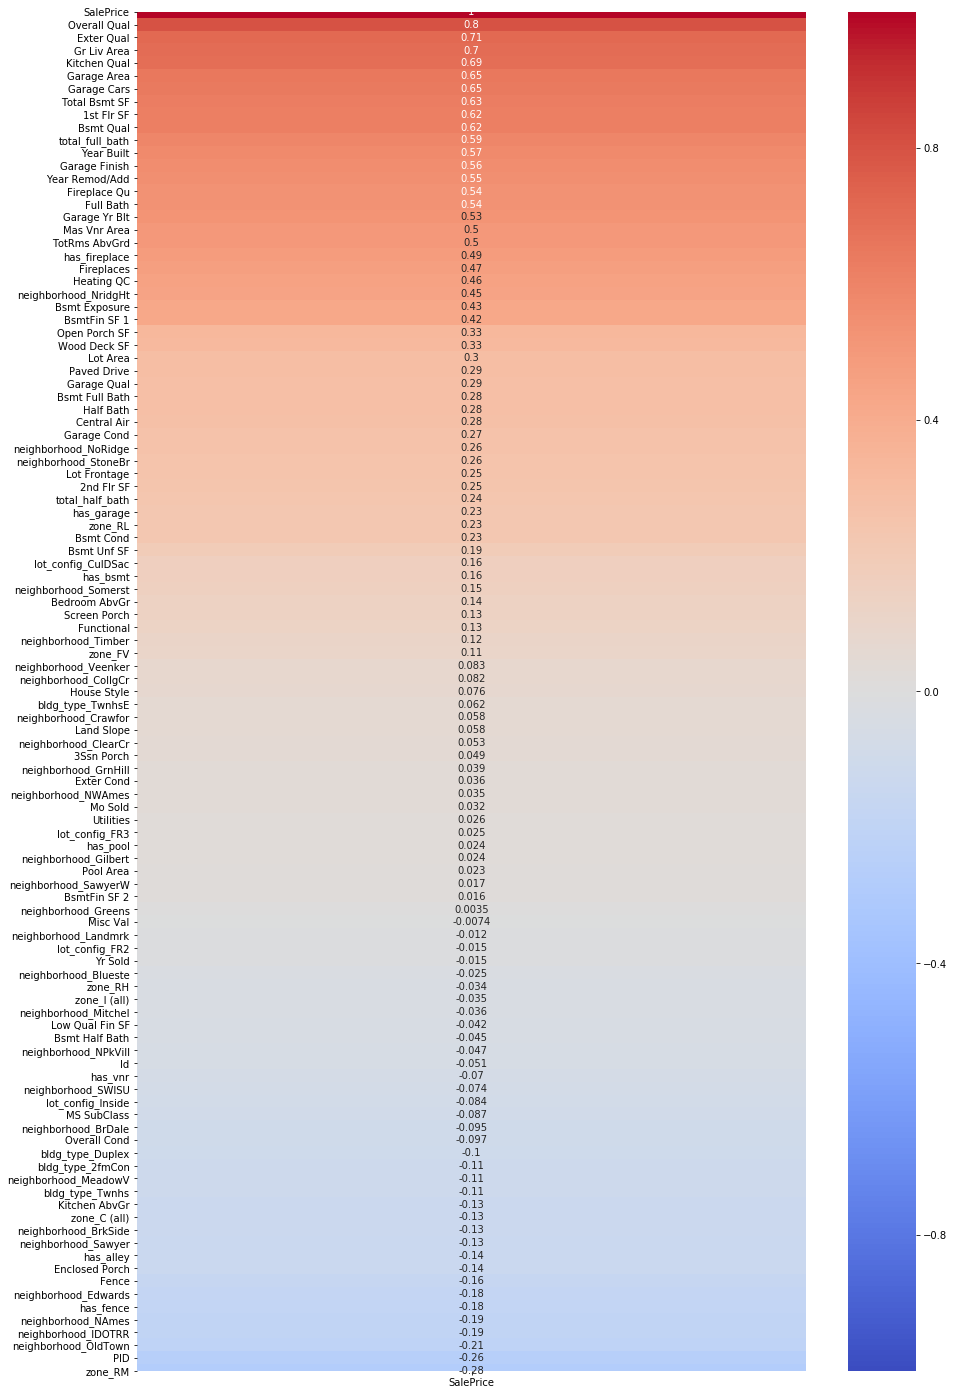

In [96]:
plt.figure(figsize=(15,25))
sns.heatmap(dum_houses.corr().sort_values(['SalePrice'], ascending=False)[['SalePrice']], 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1);

## Plot interaction term variable relationships

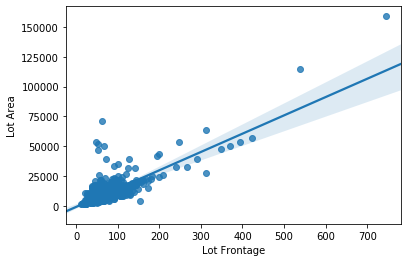

In [97]:
# Plot potential features for interaction terms
sns.regplot(dum_houses['Lot Frontage'], dum_houses['Lot Area']);

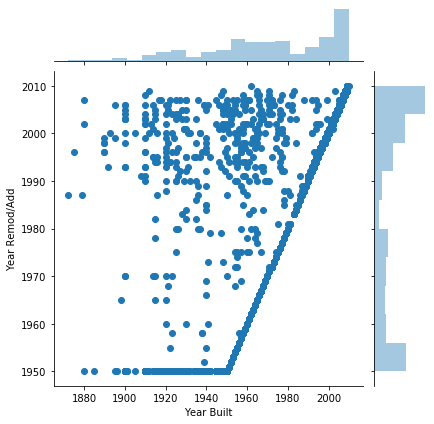

In [98]:
sns.jointplot(dum_houses['Year Built'], dum_houses['Year Remod/Add']);

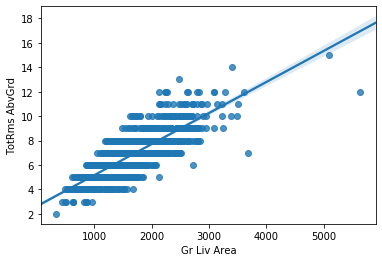

In [99]:
sns.regplot(dum_houses['Gr Liv Area'], dum_houses['TotRms AbvGrd']);

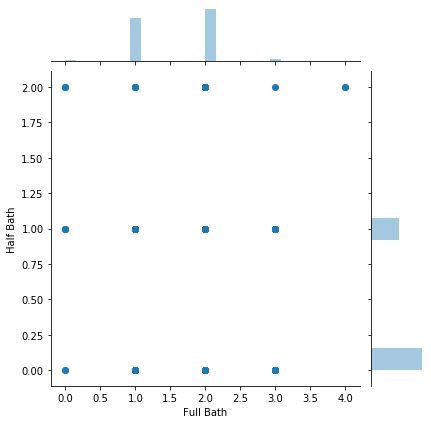

In [100]:
sns.jointplot(dum_houses['Full Bath'], dum_houses['Half Bath']);

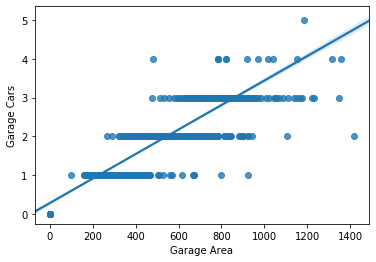

In [101]:
sns.regplot(dum_houses['Garage Area'], dum_houses['Garage Cars']);

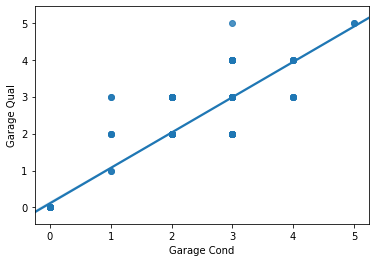

In [102]:
sns.regplot(dum_houses['Garage Cond'], dum_houses['Garage Qual']);

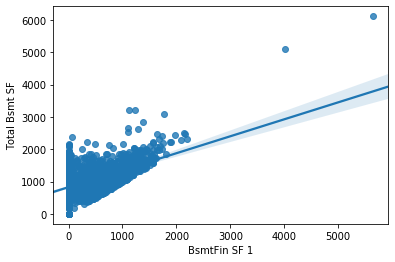

In [103]:
sns.regplot(dum_houses['BsmtFin SF 1'], dum_houses['Total Bsmt SF']);

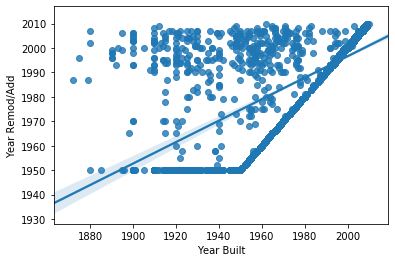

In [104]:
sns.regplot(dum_houses['Year Built'], dum_houses['Year Remod/Add']);

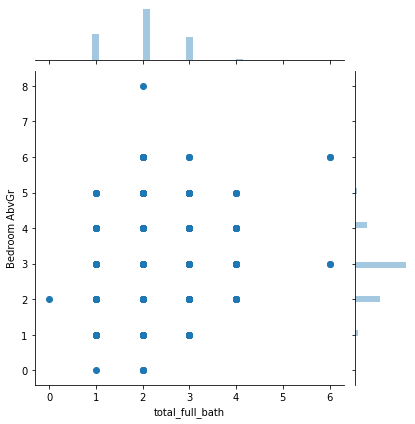

In [105]:
sns.jointplot(dum_houses['total_full_bath'], dum_houses['Bedroom AbvGr']);

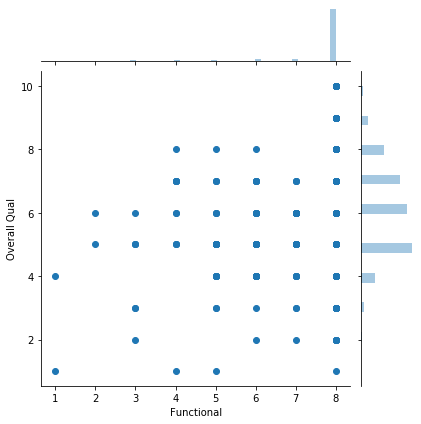

In [106]:
sns.jointplot(dum_houses['Functional'], dum_houses['Overall Qual']);

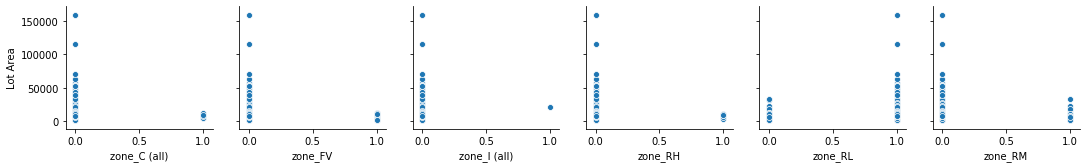

In [107]:
sns.pairplot(dum_houses, 
             x_vars=['zone_C (all)', 'zone_FV', 'zone_I (all)', 'zone_RH', 'zone_RL', 'zone_RM'], 
             y_vars=['Lot Area']);


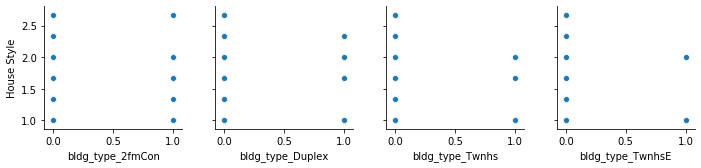

In [108]:
sns.pairplot(dum_houses, 
             x_vars=['bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE'], 
             y_vars=['House Style']);


# Create Machine Learning models

### First attempt at ML model

In [109]:
# Instantiate a linear regression model from class LinearRegression()
model = LinearRegression()

In [110]:
# Define X and y for fitting the model
y2 = houses['SalePrice']

features2 = ['Overall Qual', 
            'Full Bath', 
            'Garage Cars', 
            'Pool Area', 
            '1st Flr SF',  
            'Year Built', 
            'Year Remod/Add', 
            'TotRms AbvGrd', 
            'Fireplaces', 
            'Lot Area', 
            'Gr Liv Area', 
            'Total Bsmt SF', 
            'Enclosed Porch', 
            'Kitchen AbvGr', 
            'Mas Vnr Area']

X2 = houses[features2]


In [111]:
# Fit the model
model.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# Predict sale price based on linreg model above (find y_hat)
y_preds = model.predict(X2)
y_preds[:10]

array([181769.11861341, 234896.97505742, 128605.84908598, 153386.00198392,
       148337.89022934, 224352.77734805, 160682.2117812 , 144323.14302484,
       106237.98877271, 198901.54919003])

In [113]:
# Get null MSE for comparison with my models
null_preds = [y2.mean() for x in y2]
metrics.mean_squared_error(y2, null_preds)

6277283200.406487

In [114]:
# Get MSE for my model
metrics.mean_squared_error(y2, y_preds)

1205841446.3256364

In [115]:
# Get RMSE for my model (Kaggle score)
np.sqrt(metrics.mean_squared_error(y2, y_preds))

34725.227808117204

In [116]:
model.score(X2,y2)

0.8079039278891302

### First Kaggle submission

In [117]:
test = pd.read_csv('./datasets/test_clean.csv')
test.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area Street Lot Shape  \
0  2658  902301120          190     69.000000      9142   Pave       Reg   
1  2718  905108090           90     72.525198      9662   Pave       IR1   
2  2414  528218130           60     58.000000     17104   Pave       IR1   
3  1989  902207150           30     60.000000      8520   Pave       Reg   
4   625  535105100           20     71.309189      9500   Pave       IR1   

  Land Contour  Utilities  Land Slope  ... neighborhood_Somerst  \
0          Lvl          4           1  ...                    0   
1          Lvl          4           1  ...                    0   
2          Lvl          4           1  ...                    0   
3          Lvl          4           1  ...                    0   
4          Lvl          4           1  ...                    0   

  neighborhood_StoneBr  neighborhood_Timber  neighborhood_Veenker  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   bldg_type_2fmCon  bldg_type_Duplex  bldg_type_Twnhs bldg_type_TwnhsE  \
0                 1                 0                0                0   
1                 0                 1                0                0   
2                 0                 0                0                0   
3                 0                 0                0                0   
4                 0                 0                0                0   

  total_full_bath total_half_bath  
0               2               0  
1               2               0  
2               3               1  
3               1               0  
4               2               1  

[5 rows x 114 columns]

In [118]:
test.shape

(878, 114)

In [119]:
test_X = test[['Overall Qual', 'Full Bath', 'Garage Cars', 'Pool Area', '1st Flr SF',  'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Fireplaces', 'Lot Area', 'Gr Liv Area', 'Total Bsmt SF', 'Enclosed Porch', 'Kitchen AbvGr', 'Mas Vnr Area']]


In [120]:
test_y_pred = model.predict(test_X)
len(test_y_pred)

878

In [121]:
first = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_pred})


In [122]:
first.to_csv('./datasets/01_submission.csv', index=False)

### Second attempt at ML model

In [123]:
# Create a list of potential features (>.2 correlation from heatmap) from after column 64 
features = []
features = ['neighborhood_StoneBr', 
            'neighborhood_NridgHt', 
            'neighborhood_NoRidge', 
            'zone_RM', 
            'zone_RL', 'has_fireplace', 'has_garage']


In [124]:
# List of columns to remove from first 47 columns, excluding first 3
cols_to_drop = ['Utilities', 
               'Land Slope', 
               'House Style', 
               'Overall Cond', 
               'Exter Cond', 
               'Bsmt Cond', 
               'BsmtFin SF 2', 
               'BsmtUnf SF 1', 
               'Low Qual Fin SF', 
               'Bsmt Half Bath', 
               'Bedroom AbvGr', 
               'Kitchen AbvGr', 
               'Functional']

# Append columns to features
for col in [col for col in list(dum_houses._get_numeric_data().columns[3:48]) if col not in cols_to_drop]:
    features.append(col)


In [125]:
# Look at added column names
features[:10]

['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RM',
 'zone_RL',
 'has_fireplace',
 'has_garage',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual']

In [126]:
# Define X and y
X = dum_houses[features]

In [127]:
y = dum_houses['SalePrice']

In [128]:
# Instantiate and fit a Linear Regression model
mlr = LinearRegression()
mlr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
mlr.score(X,y)

0.8573821444933344

### Second Kaggle submission

In [130]:
test_X = test[features]

In [131]:
test_X.shape

(878, 40)

In [132]:
test_y_pred = mlr.predict(test_X)
len(test_y_pred)

878

In [133]:
second = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_pred})

In [134]:
second.to_csv('./datasets/02_submission.csv', index=False)

### Third attempt at ML model

In [135]:
# Define X and y (X is all variables with >= .5 correlation)
features3 = ['Overall Qual', 
             'Year Built', 
             'Year Remod/Add', 
             'Mas Vnr Area', 
             'Exter Qual', 
             'Bsmt Qual', 
             'Total Bsmt SF', 
             '1st Flr SF', 
             'Gr Liv Area', 
             'Full Bath', 
             'Kitchen Qual', 
             'TotRms AbvGrd', 
             'Fireplace Qu', 
             'Garage Finish', 
             'Garage Cars', 
             'Garage Area']

X3 = dum_houses[features3]
y = dum_houses['SalePrice']

In [136]:
# Instantiate and fit model
lr = LinearRegression()
lr.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
lr.score(X3, y)

0.820873824296162

### Third Kaggle submission

In [138]:
test_X = test[features3]
test_X.shape

(878, 16)

In [139]:
test_y_preds = lr.predict(test_X)

In [140]:
third = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [141]:
third.to_csv('./datasets/03_submission.csv', index=False)

### Fourth attempt at ML model

#### Feature engineering

In [142]:
# Interaction features based on intuitive colinearity, from first features list

dum_houses['lot_size'] = dum_houses['Lot Frontage'] * dum_houses['Lot Area']
dum_houses['year_built_remod/add'] = dum_houses['Year Built'] * dum_houses['Year Remod/Add']
dum_houses['bsmt_sf'] = dum_houses['BsmtFin SF 1'] * dum_houses['Bsmt Unf SF'] * dum_houses['Total Bsmt SF']
dum_houses['area_rms_abvgrd'] = dum_houses['Gr Liv Area'] * dum_houses['TotRms AbvGrd']
dum_houses['bathrooms'] = dum_houses['Full Bath'] * dum_houses['Half Bath']
dum_houses['garage_size'] = dum_houses['Garage Area'] * dum_houses['Garage Cars']
dum_houses['garage_cond_qual'] = dum_houses['Garage Cond'] * dum_houses['Garage Qual']


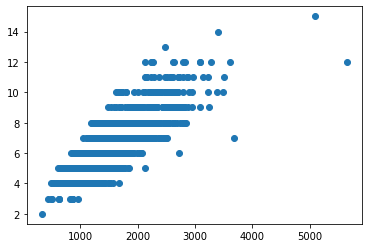

In [143]:
# Are 'Gr Liv Area' & 'TotRms AbvGrd' linearly correlated?
plt.scatter(dum_houses['Gr Liv Area'], dum_houses['TotRms AbvGrd']);

In [144]:
features4 = ['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RM',
 'zone_RL',
 'has_fireplace',
 'has_garage',
 'Overall Qual',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Bsmt Full Bath',
 'Kitchen Qual',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF', 
 'lot_size',
 'year_built_remod/add', 
 'bsmt_sf', 
 'area_rms_abvgrd', 
 'bathrooms', 
 'garage_size', 
 'garage_cond_qual']


In [145]:
# Define X and y
X = dum_houses[features4]
y = dum_houses['SalePrice']

In [146]:
# Instantitate and fit new model
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
linreg.score(X, y)

0.8627778592038918

### Fourth Kaggle submission

In [148]:
# Interaction features based on intuitive colinearity, from first features list
test['lot_size'] = test['Lot Frontage'] * test['Lot Area']
test['year_built_remod/add'] = test['Year Built'] * test['Year Remod/Add']
test['bsmt_sf'] = test['BsmtFin SF 1'] * test['Bsmt Unf SF'] * test['Total Bsmt SF']
test['area_rms_abvgrd'] = test['Gr Liv Area'] * test['TotRms AbvGrd']
test['bathrooms'] = test['Full Bath'] * test['Half Bath']
test['garage_size'] = test['Garage Area'] * test['Garage Cars']
test['garage_cond_qual'] = test['Garage Cond'] * test['Garage Qual']

In [149]:
test_X = test[features4]

In [150]:
test_X.shape

(878, 31)

In [151]:
test_y_preds = linreg.predict(test_X)

In [152]:
fourth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [153]:
fourth.to_csv('./datasets/04_submission.csv', index=False)

### Fifth attempt at ML model

#### Try comparing X to log(y) with best model so far (Attempt #2)

In [154]:
X = dum_houses[features]
y = np.log(dum_houses['SalePrice'])

In [155]:
mlm = LinearRegression()
mlm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
mlm.score(X, y)

0.8712770621105735

### Fifth Kaggle submission

In [157]:
test_X = test[features]

In [158]:
test_y_preds = np.exp(mlm.predict(test_X))

In [159]:
fifth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [160]:
fifth.to_csv('./datasets/05_submission.csv', index=False)

### Sixth attempt at ML model

Fifth attempt, but with features4 list of columns

### Seventh attempt at ML model

#### Plot relationships between individual variables & SalePrice

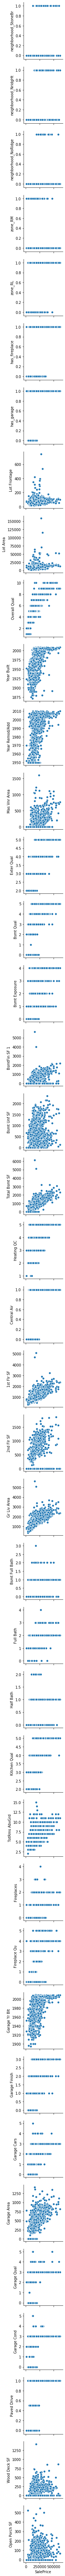

In [161]:
# Look at which x variables have logarithmic relationships with y
sns.pairplot(dum_houses, x_vars='SalePrice', y_vars=features);

In [162]:
# List of variables with closest to logarithmic/linear relationship with y
cols = ['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RL',
 'has_fireplace',
 'has_garage',
 'Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive']

In [163]:
X = dum_houses[cols]
y = np.log(dum_houses['SalePrice'])

In [164]:
lrm = LinearRegression()
lrm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
lrm.score(X, y)

0.8699386290172303

### Seventh Kaggle submission

In [166]:
test_X = test[cols]

In [167]:
test_y_preds = np.exp(lrm.predict(test_X))

In [168]:
seventh = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [169]:
seventh.to_csv('./datasets/07_submission.csv', index=False)

### Eighth attempt at ML model

#### Check OLS summary and remove variables with insignifanct p-values

In [170]:
# Redefine X and y and fit to a model

X = dum_houses[features]
y = np.log(dum_houses['SalePrice'])

mlrmlr = LinearRegression()
mlrmlr.fit(X, y)

# Add constant column to X
X = sm.add_constant(X)

# Fit the model and get summary stats
model = sm.OLS(y, X).fit()
model.summary()

/Users/kelly/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     339.6
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:11:27   Log-Likelihood:                 1014.3
No. Observations:                2048   AIC:                            -1947.
Df Residuals:                    2007   BIC:                            -1716.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.1353      0.616     13.199      0.000       6.927       9.344
neighborhood_StoneBr     0.0828      0.026      3.156      0.002       0.031       0.134
neighborhood_NridgHt     0.0699      0.017      4.075      0.000       0.036       0.104
neighborhood_NoRidge     0.0718      0.024      2.946      0.003       0.024       0.120
zone_RM                 -0.0696      0.017     -4.153      0.000      -0.102      -0.037
zone_RL                  0.0130      0.015      0.890      0.373      -0.016       0.042
has_fireplace           -0.0126      0.027     -0.460      0.646      -0.066       0.041
has_garage              -0.3357      0.059     -5.660      0.000      -0.452      -0.219
Lot Frontage          5.912e-05      0.000      0.355      0.722      -0.000       0.000
Lot Area              2.746e-06   8.63e-07      3.184      0.001    1.05e-06    4.44e-06
Overall Qual             0.0775      0.005     16.911      0.000       0.069       0.087
Year Built               0.0002      0.000      0.798      0.425      -0.000       0.001
Year Remod/Add           0.0015      0.000      6.065      0.000       0.001       0.002
Mas Vnr Area         -1.874e-05   2.33e-05     -0.805      0.421   -6.44e-05    2.69e-05
Exter Qual               0.0170      0.010      1.659      0.097      -0.003       0.037
Bsmt Qual                0.0255      0.007      3.912      0.000       0.013       0.038
Bsmt Exposure            0.0168      0.004      4.420      0.000       0.009       0.024
BsmtFin SF 1          3.029e-06   2.14e-05      0.141      0.888    -3.9e-05     4.5e-05
Bsmt Unf SF          -3.533e-05   2.18e-05     -1.618      0.106   -7.82e-05     7.5e-06
Total Bsmt SF         4.847e-05   2.65e-05      1.830      0.067   -3.48e-06       0.000
Heating QC               0.0245      0.005      5.432      0.000       0.016       0.033
Central Air              0.1118      0.016      7.212      0.000       0.081       0.142
1st Flr SF               0.0001   6.98e-05      2.110      0.035    1.04e-05       0.000
2nd Flr SF               0.0001   6.78e-05      1.595      0.111   -2.49e-05       0.000
Gr Liv Area           4.361e-05   6.78e-05      0.643      0.520   -8.94e-05       0.000
Bsmt Full Bath           0.0419      0.009      4.758      0.000       0.025       0.059
Full Bath                0.0309      0.010      3.145      0.002       0.012       0.050
Half Bath                0.0004      0.010      0.037      0.970      -0.019       0.020
Kitchen Qual             0.0389      0.008      4.732      0.000       0.023       0.055
TotRms AbvGrd            0.0113      0.004      2.873      0.004       0.004       0.019
Fireplaces               0.0154      0.013      1.170      0.242      -0.010       0.041
Fireplace Qu             0.0145      0.007      2.196    

In [171]:
# List of variables with significant coefficients
sig_features = ['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RM',
 'has_garage',
 'Lot Area',
 'Overall Qual',
 'Year Remod/Add',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Cond',
 'Paved Drive']

In [172]:
sig_inter_features = ['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RM',
 'has_garage',
 'Lot Area',
 'Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Paved Drive', 
 'lot_size',
 'year_built_remod/add', 
 'bsmt_sf', 
 'area_rms_abvgrd', 
 'garage_size', 
 'garage_cond_qual']

In [173]:
# Redefine X and y and fit to a model

X = dum_houses[sig_inter_features]
y = np.log(dum_houses['SalePrice'])

multlinreg = LinearRegression()
multlinreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
multlinreg.score(X, y)

0.8739551103437926

### Eighth Kaggle submission

In [175]:
test_X = test[sig_inter_features]

In [176]:
test_y_preds = np.exp(multlinreg.predict(test_X))

In [177]:
eighth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [178]:
eighth.to_csv('./datasets/08_submission.csv', index=False)

### Ninth attempt at ML model

None of the above created interaction features seem to affect the score positively. Brainstorm a couple new interaction features, add to original "features" list and attempt.

In [179]:
edited_features = ['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'neighborhood_NoRidge',
 'zone_RM',
 'zone_RL',
 'has_fireplace',
 'has_garage',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF']

In [180]:
# Redefine X and y and fit to a model

X = dum_houses[edited_features]
y = np.log(dum_houses['SalePrice'])

edit_mlm = LinearRegression()
edit_mlm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
edit_mlm.score(X,y)

0.8711867319090687

### Ninth Kaggle submission

In [182]:
test_X = test[edited_features]

In [183]:
test_y_preds = np.exp(edit_mlm.predict(test_X))

In [184]:
ninth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [185]:
ninth.to_csv('./datasets/09_submission.csv', index=False)

The ninth model has received the best score (RMSE) in Kaggle so far.

### Tenth attempt at ML model

In [186]:
# Attempt to do the following to edit the models above:
# 1. Add a ['has_condition'] column with [0, 1, 2] for how many special conidtions a home has
# 2. Use a better method to filter columns for correlations > .2 with 'SalePrice'
# 3. For interaction terms, ALSO include the base columns


In [187]:
# Create a ['has_condition'] column with [0, 1, 2] for how many special conidtions a home has 
dum_houses['has_condition1'] = [1 if x != 'Norm' else 0 for x in dum_houses['Condition 1']]
dum_houses['has_condition2'] = [1 if x != 'Norm' else 0 for x in dum_houses['Condition 2']]
dum_houses['has_condition'] = dum_houses['has_condition1'] + dum_houses['has_condition2']
dum_houses.drop(columns=['has_condition1', 'has_condition2'], inplace=True)

In [188]:
# Interaction features based on intuitive colinearity, from good features list, modified

dum_houses['bsmtfin_sf1_total_sf'] = dum_houses['BsmtFin SF 1'] * dum_houses['Total Bsmt SF']
dum_houses['year_built_remod/add'] = dum_houses['Year Built'] * dum_houses['Year Remod/Add']
dum_houses['area_rms_abvgrd'] = dum_houses['Gr Liv Area'] * dum_houses['TotRms AbvGrd']
dum_houses['bathrooms'] = dum_houses['Full Bath'] * dum_houses['Half Bath']
dum_houses['garage_size'] = dum_houses['Garage Area'] * dum_houses['Garage Cars']
dum_houses['garage_cond_qual'] = dum_houses['Garage Cond'] * dum_houses['Garage Qual']
dum_houses.drop(columns=['bsmt_sf'], inplace=True)


In [189]:
# Sort all variables by correlation with 'SalePrice' and filter for correlation > .2 or < -.2
good_features = list(dum_houses.corr().sort_values(['SalePrice'], ascending=False)[['SalePrice']].loc[(dum_houses.corr()['SalePrice'] > .2) | (dum_houses.corr()['SalePrice'] < -.2)].index)
good_features.remove('SalePrice')
good_features.remove('PID')

# Check if length is the same as first features list (which was supposed to be this)
len(good_features) - len(features)


9

In [190]:
# Length is 7 longer than original, check which values are new
for feat in good_features:
    if feat not in features:
        print(feat)


garage_size
year_built_remod/add
area_rms_abvgrd
total_full_bath
bathrooms
bsmtfin_sf1_total_sf
garage_cond_qual
total_half_bath
Bsmt Cond
neighborhood_OldTown


In [191]:
# Check if there are any columns in features that are not in good_features
for feat in features:
    if feat not in good_features:
        print(feat)


Bsmt Unf SF


No need to add 'Bsmt Unf SF' and no need to add the only interaction term not there ('lot_size'). The new column 'has_condition' also does not appear.

In [192]:
# Check that all variables that built the interaction terms are included

interaction_base_cols = ['Year Built', 
                         'Year Remod/Add', 
                         'Gr Liv Area', 
                         'TotRms AbvGrd', 
                         'Full Bath', 
                         'Half Bath', 
                         'Garage Area', 
                         'Garage Cars', 
                         'Garage Cond', 
                         'Garage Qual', 
                         'BsmtFin SF 1', 
                         'Total Bsmt SF']

for col in interaction_base_cols:
    if col not in good_features:
        good_features.append(col)
        print(col)
        

In [193]:
# Define new X and y
X = dum_houses[good_features]
y = np.log(dum_houses['SalePrice'])

In [194]:
# Instantiate and fit new model
good_mlr = LinearRegression()
good_mlr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
good_mlr.score(X, y)

0.8972236546248684

### Tenth Kaggle submission

In [196]:
# Add interaction features used in model to test data

test['bsmtfin_sf1_total_sf'] = test['BsmtFin SF 1'] * test['Total Bsmt SF']
test['year_built_remod/add'] = test['Year Built'] * test['Year Remod/Add']
test['area_rms_abvgrd'] = test['Gr Liv Area'] * test['TotRms AbvGrd']
test['bathrooms'] = test['Full Bath'] * test['Half Bath']
test['garage_size'] = test['Garage Area'] * test['Garage Cars']
test['garage_cond_qual'] = test['Garage Cond'] * test['Garage Qual']
test.drop(columns=['bsmt_sf'], inplace=True)


In [197]:
test_X = test[good_features]

In [198]:
test_y_preds = np.exp(good_mlr.predict(test_X))

In [199]:
tenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [200]:
tenth.to_csv('./datasets/10_submission.csv', index=False)

This model scored worse than the last model. However, the R^2 score on train data was higher. This model is overfit. Time to start taking away features.

### Eleventh attempt at ML model

In [201]:
# Plan:
# 1. Look at OLS summary to see which features are not statistically significant
# 2. Use judgment to determine if some features should go and what new features to test
# 3. Look at OLS summary of these features again possibly filter for statsig again


In [202]:
# Redefine X and y and fit to a model

X = dum_houses[good_features]
y = np.log(dum_houses['SalePrice'])

good_mlr = LinearRegression()
good_mlr.fit(X, y)

# Add constant column to X
X = sm.add_constant(X)

# Fit the model and get summary stats
model = sm.OLS(y, X).fit()
model.summary()

/Users/kelly/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     363.6
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:11:27   Log-Likelihood:                 1244.8
No. Observations:                2048   AIC:                            -2392.
Df Residuals:                    1999   BIC:                            -2116.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -23.9108     28.494     -0.839      0.401     -79.792      31.970
Overall Qual             0.0735      0.004     17.775      0.000       0.065       0.082
Exter Qual               0.0261      0.009      2.810      0.005       0.008       0.044
Gr Liv Area              0.0003   6.81e-05      4.066      0.000       0.000       0.000
Kitchen Qual             0.0360      0.007      4.874      0.000       0.022       0.051
garage_size           4.716e-05   2.21e-05      2.133      0.033     3.8e-06    9.05e-05
Garage Area          -5.519e-05   6.12e-05     -0.902      0.367      -0.000    6.48e-05
Garage Cars             -0.0051      0.015     -0.340      0.734      -0.034       0.024
Total Bsmt SF         9.592e-05   1.66e-05      5.794      0.000    6.35e-05       0.000
year_built_remod/add -7.808e-06   7.35e-06     -1.063      0.288   -2.22e-05     6.6e-06
1st Flr SF               0.0001   6.32e-05      1.982      0.048    1.34e-06       0.000
Bsmt Qual                0.0079      0.007      1.138      0.255      -0.006       0.022
area_rms_abvgrd      -2.038e-05   3.07e-06     -6.649      0.000   -2.64e-05   -1.44e-05
total_full_bath          0.0072      0.005      1.602      0.109      -0.002       0.016
Year Built               0.0159      0.015      1.090      0.276      -0.013       0.045
Garage Finish            0.0084      0.005      1.664      0.096      -0.001       0.018
Year Remod/Add           0.0169      0.014      1.180      0.238      -0.011       0.045
Fireplace Qu             0.0162      0.006      2.703      0.007       0.004       0.028
Full Bath               -0.0030      0.007     -0.428      0.669      -0.017       0.011
Garage Yr Blt           -0.0002      0.000     -0.561      0.575      -0.001       0.000
Mas Vnr Area          2.941e-06   2.11e-05      0.139      0.889   -3.85e-05    4.43e-05
TotRms AbvGrd            0.0390      0.006      6.319      0.000       0.027       0.051
has_fireplace           -0.0556      0.025     -2.230      0.026      -0.105      -0.007
Fireplaces               0.0349      0.012      2.956      0.003       0.012       0.058
Heating QC               0.0229      0.004      5.537      0.000       0.015       0.031
neighborhood_NridgHt     0.0525      0.016      3.345      0.001       0.022       0.083
Bsmt Exposure            0.0146      0.003      4.252      0.000       0.008       0.021
BsmtFin SF 1             0.0002   1.45e-05     14.525      0.000       0.000       0.000
bathrooms               -0.0022      0.011     -0.203      0.839      -0.023       0.019
bsmtfin_sf1_total_sf -9.439e-08      6e-09    -15.726      0.000   -1.06e-07   -8.26e-08
Open Porch SF         6.222e-05      5e-05      1.245      0.213   -3.58e-05       0.000
Wood Deck SF          3.328e-05   2.57e-05      1.297    

Remember, 'Year Remod/Add' was statsig above without the interaction feature. Remove 'Year Built' and 'year_built_remod/add'. 'Garage Cars' was also statsig above without the interaction feature. Remove 'Garage Area' and 'garage_size'. Remove 'Garage Finish' and 'Mas Vnr Built'. 'Full Bath' was statsig and 'Half Bath' wasn't before interaction feature--remove 'Half Bath' and 'bathrooms'. Remove 'Garage Yr Blt', 'Lot Frontage', '2nd Flr SF', 'zone_RL', 'Bsmt Cond', and 'neighborhood_OldTown'.

However, test 'garage_size' and 'year_built_remod/add' later after model has been simplified.

In [203]:
# Create new feature list dropping insignificant vars from OLS summary
filtered_features = good_features

feats_to_drop = ['Year Built', 
                 'year_built_remod/add', 
                 'Garage Area', 
                 'garage_size', 
                 'Garage Finish', 
                 'Mas Vnr Area', 
                 'Half Bath', 
                 'bathrooms', 
                 'Garage Yr Blt', 
                 'Lot Frontage', 
                 '2nd Flr SF', 
                 'zone_RL', 
                 'Bsmt Cond', 
                 'neighborhood_OldTown']

for col in feats_to_drop:
    filtered_features.remove(col)
    print(col)

Year Built
year_built_remod/add
Garage Area
garage_size
Garage Finish
Mas Vnr Area
Half Bath
bathrooms
Garage Yr Blt
Lot Frontage
2nd Flr SF
zone_RL
Bsmt Cond
neighborhood_OldTown


In [204]:
len(filtered_features)

35

In [205]:
# Look at numerica columns to determine which might make for good interaction terms
dum_houses._get_numeric_data().columns[:65]

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Utilities',
       'Land Slope', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'has_vnr', 'has_bsmt', 'has_alley', 'has_fireplace',

Features to test for interaction:
- same # of bathrooms as bedrooms? desirable--> don't want less or more
- 'Lot Area' with 'MS Zone' dummies???
- 'Bldg Type' dummies and house style
- 'Heating' & 'Heating QC'
- add 'Full Bath' & 'Bsmt Full Bath'
- add 'Half Bath' & 'Bsmt Half Bath'
- 'Functional' & 'Overall Qual'

In [206]:
# Create 13 new interaction terms

dum_houses['beds_baths'] = dum_houses['total_full_bath'] * dum_houses['Bedroom AbvGr']
dum_houses['func_overall_qual'] = dum_houses['Functional'] * dum_houses['Overall Qual']

dum_houses['lot_area_zone_C (all)'] = dum_houses['Lot Area'] * dum_houses['zone_C (all)']
dum_houses['lot_area_zone_FV'] = dum_houses['Lot Area'] * dum_houses['zone_FV']
dum_houses['lot_area_zone_I (all)'] = dum_houses['Lot Area'] * dum_houses['zone_I (all)']
dum_houses['lot_area_zone_RH'] = dum_houses['Lot Area'] * dum_houses['zone_RH']
dum_houses['lot_area_zone_RL'] = dum_houses['Lot Area'] * dum_houses['zone_RL']
dum_houses['lot_area_zone_RM'] = dum_houses['Lot Area'] * dum_houses['zone_RM']

dum_houses['house_style_bldg_type_2fmCon'] = dum_houses['House Style'] * dum_houses['bldg_type_2fmCon']
dum_houses['house_style_bldg_type_Duplex'] = dum_houses['House Style'] * dum_houses['bldg_type_Duplex']
dum_houses['house_style_bldg_type_Twnhs'] = dum_houses['House Style'] * dum_houses['bldg_type_Twnhs']
dum_houses['house_style_bldg_type_TwnhsE'] = dum_houses['House Style'] * dum_houses['bldg_type_TwnhsE']



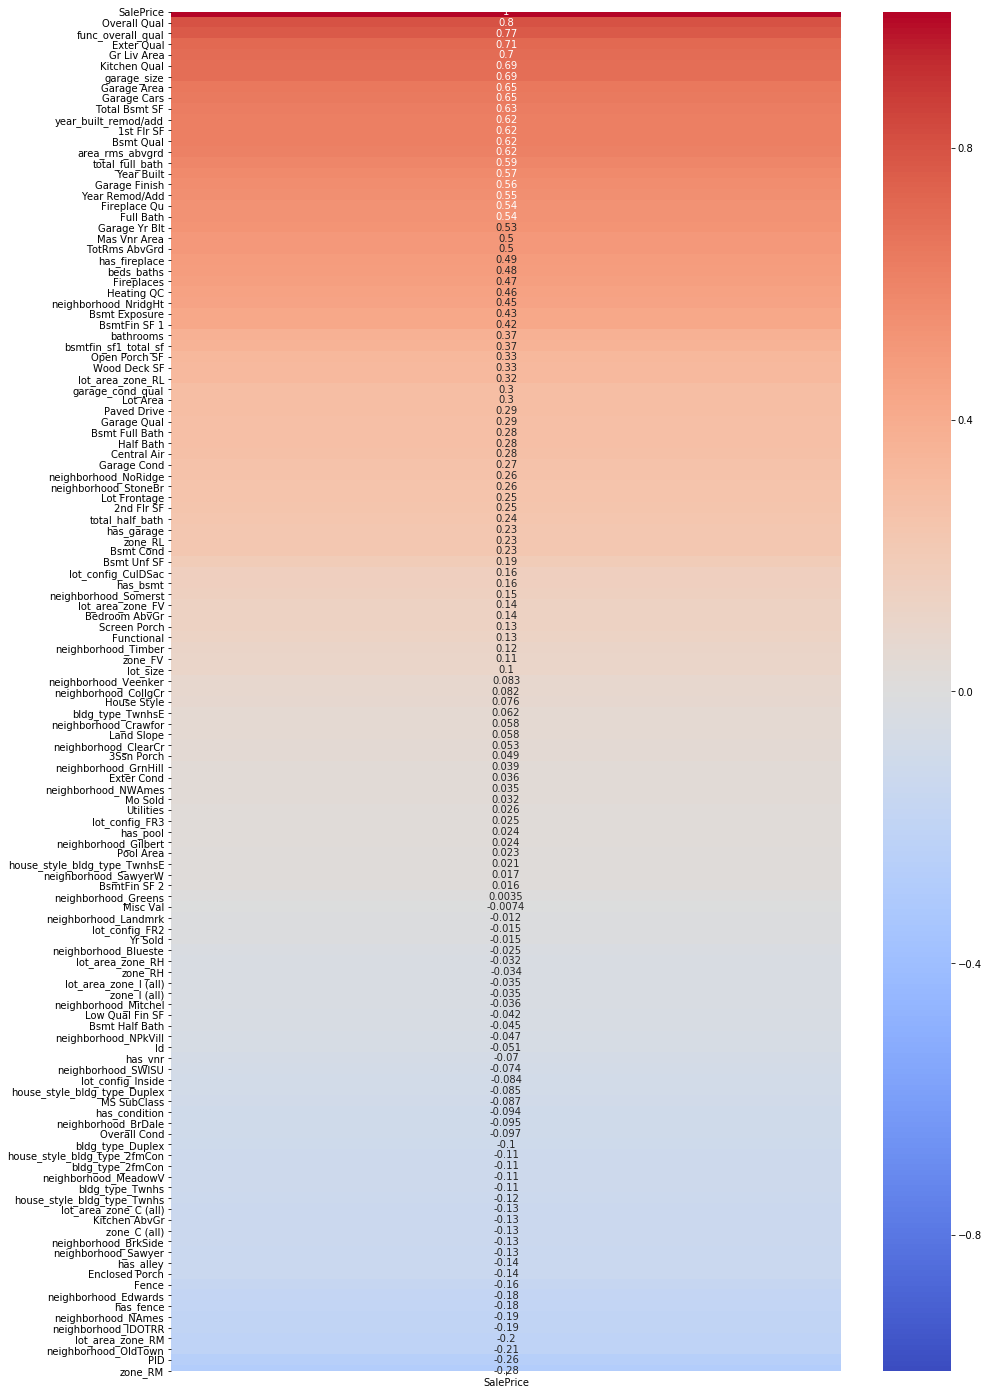

In [207]:
# Check if any of the new columns have high correlations with 'SalePrice'
plt.figure(figsize=(15,25))
sns.heatmap(dum_houses.corr().sort_values(['SalePrice'], ascending=False)[['SalePrice']], 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1);

New interaction terms or calculated columns with high correlations: 'total_full_bath' & 'func_overall_qual'. Add to filtered_features.

In [208]:
# Run 3 different tests (using train_test_split):
# 1. Filtered features as is
# 2. Filtered features + 2 new columns (and both contributing columns)
# 3. All features on the new correlation list > .5 (none < -.5)

#### 1. 11.a Filtered features as is

In [209]:
len(filtered_features)

35

In [210]:
# Define new X and y
X = dum_houses[filtered_features]
y = np.log(dum_houses['SalePrice'])

# Split data into train set / test set on 75% / 25% split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# Instantiate and fit new model
elevena_mlr = LinearRegression()
elevena_mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
# Get R^2 on train data
elevena_mlr.score(X_train, y_train)

0.8973713361535629

In [212]:
# Get R^2 on test data
elevena_mlr.score(X_test, y_test)

0.8843702496246493

In [213]:
# Get R^2 cross val score
cross_val_score(elevena_mlr, X_train, y_train).mean()

/Users/kelly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.887557671895942

#### 2. 11.b Filtered features + 2 new columns (plus contributing columns)

In [214]:
# Create new feature list, adding 3 new columns to filtered_features
new_filtered_features = filtered_features.copy()
new_filtered_features.append('total_full_bath')
new_filtered_features.append('func_overall_qual')
new_filtered_features.append('Functional')


In [215]:
# Define new X and y
X = dum_houses[new_filtered_features]
y = np.log(dum_houses['SalePrice'])

# Split data into train set / test set on 75% / 25% split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# Instantiate and fit new model
elevenb_mlr = LinearRegression()
elevenb_mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
# Get R^2 on train data
elevenb_mlr.score(X_train, y_train)

0.9033060252395684

In [217]:
# Get R^2 on test data
elevenb_mlr.score(X_test, y_test)

0.8879135910161039

In [218]:
# Get R^2 cross val score
cross_val_score(elevenb_mlr, X_train, y_train).mean()

/Users/kelly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8938554460958882

#### 3. 11.c All features on the new correlation list > .5 (none < -.5)

In [219]:
# Create list of all features from correlation with >.5
over_fifty = list(dum_houses.corr().sort_values(['SalePrice'], ascending=False)[['SalePrice']].loc[(dum_houses.corr()['SalePrice'] > .5) | (dum_houses.corr()['SalePrice'] < -.5)].index)
over_fifty.remove('SalePrice')

over_fifty

['Overall Qual',
 'func_overall_qual',
 'Exter Qual',
 'Gr Liv Area',
 'Kitchen Qual',
 'garage_size',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 'year_built_remod/add',
 '1st Flr SF',
 'Bsmt Qual',
 'area_rms_abvgrd',
 'total_full_bath',
 'Year Built',
 'Garage Finish',
 'Year Remod/Add',
 'Fireplace Qu',
 'Full Bath',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [220]:
# Make sure all base columns of included interaction tersm are added
over_fifty.append('Functional')
over_fifty.append('Bsmt Full Bath')

In [221]:
# Define new X and y
X = dum_houses[over_fifty]
y = np.log(dum_houses['SalePrice'])

# Split data into train set / test set on 75% / 25% split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# Instantiate and fit new model
elevenc_mlr = LinearRegression()
elevenc_mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
# Get R^2 on train data
elevenc_mlr.score(X_train, y_train)

0.8646658433420251

In [223]:
# Get R^2 on test data
elevenc_mlr.score(X_test, y_test)

0.8662238683032701

In [224]:
# Get R^2 cross val score
cross_val_score(elevenc_mlr, X_train, y_train).mean()

/Users/kelly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8547488259449053

### Eleventh Kaggle submission

Use model 'elevenb_mlr' because it yielded the highest score on test and train data of the three above.

In [225]:
# Create new interaction term
test['func_overall_qual'] = test['Functional'] * test['Overall Qual']


In [226]:
test_X = test[new_filtered_features]

In [227]:
test_y_preds = np.exp(elevenb_mlr.predict(test_X))

In [228]:
eleventh = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [229]:
eleventh.to_csv('./datasets/11_submission.csv', index=False)

Though this model scored the highest so far on train, test, and cross val scores, it performed worse in Kaggle than a few others.

### Twelfth Kaggle submission

Try model 'elevenc_mlr', which is simpler and may generalize better.

In [230]:
test_X = test[over_fifty]

In [231]:
test_y_preds = np.exp(elevenc_mlr.predict(test_X))

In [232]:
twelfth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [233]:
twelfth.to_csv('./datasets/12_submission.csv', index=False)

### Thirteenth Kaggle submission

Try model 'elevena_mlr' just for good measure.

In [234]:
test_X = test[filtered_features]

In [235]:
test_X.shape

(878, 35)

In [236]:
test_y_preds = np.exp(elevena_mlr.predict(test_X))

In [237]:
thirteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y_preds})

In [238]:
thirteenth.to_csv('./datasets/13_submission.csv', index=False)

### Fourteenth attempt at model

In [239]:
# Use Ridge on previously high-scoring but overfit model

In [240]:
# Redefine X and y
X = dum_houses[edited_features]
y = dum_houses['SalePrice']

# Split data into train set / test set on 75% / 25% split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)
# Standardize data
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [241]:
# Find best ridge alpha
ridge_alphas = np.logspace(-3, 1, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas=ridge_alphas, 
    scoring='r2',
    cv=5
)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03, 1.32194115e-03,
       1.45082878e-03, 1.59228279e-03, 1.74752840e-03, 1.91791026e-03,
       2.10490414e-03, 2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03, 4.03701726e-03,
       4.43062146e-03, 4.86260158e-03, 5.33669923e-03, 5.85702082e-03,
       6.42807312e-03, 7.05480231e-0...
       1.70735265e+00, 1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00, 3.27454916e+00,
       3.59381366e+00, 3.94420606e+00, 4.32876128e+00, 4.75081016e+00,
       5.21400829e+00, 5.72236766e+00, 6.28029144e+00, 6.89261210e+00,
       7.56463328e+00, 8.30217568e+00, 9.11162756e+00, 1.00000000e+01]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [242]:
# Look at optimal alpha
ridge_cv.alpha_

10.0

In [243]:
# Evaluate model using R2
ridge_cv.score(Z_train, y_train)

0.8502306307383787

In [244]:
ridge_cv.score(Z_test, y_test)

0.8680283646865182

### Fourteenth Kaggle submission

In [245]:
# Define X
test_X = test[edited_features]

# Standardize data
test_Z = ss.transform(test_X)

In [246]:
ridge_test_y_preds = ridge_cv.predict(test_Z)

In [247]:
fourteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': ridge_test_y_preds})

In [248]:
fourteenth.to_csv('./datasets/14_submission.csv', index=False)

In [249]:
ridge_test_y_preds

array([100034.59216368, 160538.03488314, 233294.2245305 ,  94291.85080385,
       178282.32366648,  70646.80737155,  82929.74403329, 130648.12129506,
       175076.88623205, 150665.78171176, 158112.22404658, 105244.57441737,
       152190.18182974, 268536.89493034, 155191.09054741, 130429.06632344,
       159517.91715597, 102182.78819022, 187911.5528322 , 208943.52083901,
       154556.29492375, 110564.06714469, 201195.17599661, 170563.03250889,
       167793.48168755,  96698.86210364, 150207.35739982, 114494.74977854,
       164675.69079963,  34119.86006115,  75240.3314746 ,  79604.45945489,
       236900.46725389, 154790.21818855, 209699.37691747, 169557.07500117,
        95217.66169083,  50341.35943649, 140774.43127926, 175636.47078415,
       163982.22190801, 215830.16641689, 141992.82339367, 170200.54101844,
       227164.62802888, 102246.7849705 , 223373.86486604, 111446.5870499 ,
       107167.39025526, 104641.50847588,  87800.46037557, 184103.95650172,
       248415.29198907, 1

Ridge didn't help at all with fitting to the test data on Kaggle, regardless of whether or not we took the log of y.

### Fifteenth attempt

In [250]:
# Use Lasso on the same model above, same X and y

In [251]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(1, 2, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(
    alphas=lasso_alphas, 
    cv=5, 
    max_iter=5000 # default=1000, bad idea
)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([ 10.        ,  10.23531022,  10.47615753,  10.72267222,
        10.97498765,  11.23324033,  11.49756995,  11.76811952,
        12.0450354 ,  12.32846739,  12.61856883,  12.91549665,
        13.21941148,  13.53047775,  13.84886371,  14.17474163,
        14.50828778,  14.84968262,  15.19911083,  15.55676144,
        15.92282793,  16.29750835,  16.68100537,  17.07352647,
        17.475284  ,  17.88649529,  18.3073828 ,  18.73817423,
        19.1...
        70.54802311,  72.20809018,  73.90722034,  75.64633276,
        77.42636827,  79.24828984,  81.11308308,  83.02175681,
        84.97534359,  86.97490026,  89.02150854,  91.11627561,
        93.26033469,  95.45484567,  97.70099573, 100.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [252]:
lasso_cv.alpha_

81.11308307896873

In [253]:
lasso_cv.coef_

array([ 8042.62398677,  9919.91951919,  4929.79608755, -4166.9936926 ,
       -1708.32335951, -5106.96500966, -8955.37778235, -2176.00602036,
        6312.96808481, 15004.23799062,   824.00730502,  2265.36788606,
        2565.93291648,  7200.6279633 ,  4253.41987185,  5357.98620974,
       -4145.75989169,  3702.88571392,  2734.17906644,    40.45570468,
       11740.00708778,  8188.27354287,  3684.6542177 ,  2895.78953289,
        1598.37409302,  7296.86679837,  3177.88799048, 10822.21694556,
       -2473.13170556,  1569.61268532,  8454.80221306,  6268.79619134,
          -0.        ,  2391.14890372,   526.72955781,  -217.84390664])

In [254]:
lasso_cv.score(Z_train, y_train)

0.8501407754094407

In [255]:
lasso_cv.score(Z_test, y_test)

0.8681543641986599

### Fifteenth Kaggle submission

In [256]:
test_X = test[edited_features]

# Standardize data
test_Z = ss.fit_transform(test_X)

In [257]:
lasso_test_y_preds = lasso_cv.predict(test_Z)

In [258]:
lasso_test_y_preds

array([107430.01962784, 168752.19061126, 236368.55205271, 102886.65438283,
       185637.863026  ,  78228.20282935,  89413.35950694, 138963.95149371,
       185783.36039848, 158524.77991829, 168279.80676411, 115925.92498924,
       159380.08919056, 275711.79772673, 160531.55154175, 136252.86823972,
       163916.5487697 , 109229.87284071, 195859.53661332, 215231.63244277,
       161595.0052872 , 118947.96916726, 211594.83736853, 175379.31682646,
       179084.37550778, 105005.11399989, 153564.56780622, 122251.00234495,
       173452.50528884,  41264.53615946,  82261.24483822,  86493.84888276,
       244873.43281628, 162166.51594942, 219259.46772387, 174742.32562465,
       102008.28110659,  57266.22199435, 148766.74833281, 186998.25274793,
       173356.31816885, 222835.32627726, 151474.66053385, 175062.61669999,
       238864.77984601, 109566.31998838, 230741.23036808, 117954.9032044 ,
       115876.75261873, 112761.27393717,  95058.59322594, 195912.88365842,
       259147.37234361, 1

In [259]:
fifteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_test_y_preds})

In [260]:
fifteenth.to_csv('./datasets/15_submission.csv', index=False)

Lasso similarly made for a very low score on Kaggle, regardless of whether or not we took the log of y. The best-performing model on Kaggle was still the ninth submission (edited_mlm). The highest-scoring model on this training data is still the twelfth submission (elevenb_mlr), though it did not generalize well. The latter model's features in Linear Regression make for a much worse model using Ridge or Lasso. Unsure why.

# Visualize results

In [261]:
y_hat = np.exp(edit_mlm.predict(X))
dum_houses['SalePrice_preds'] = y_hat

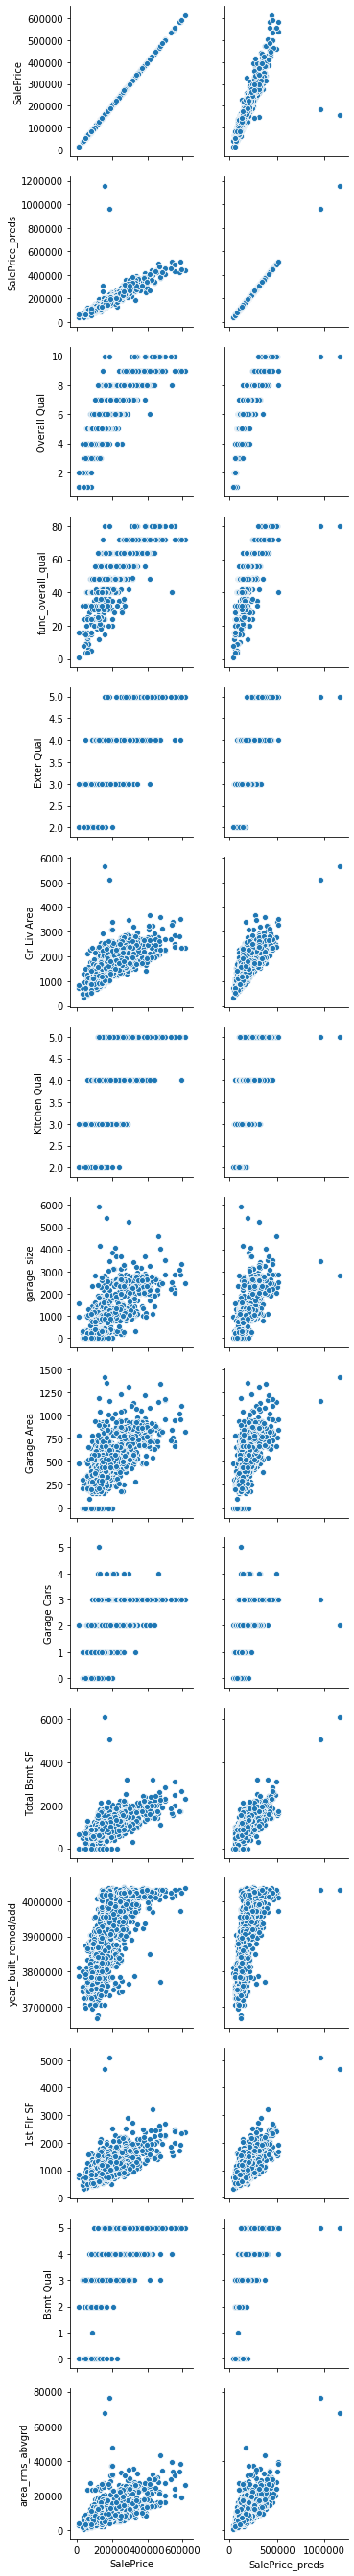

In [262]:
sns.pairplot(dum_houses, 
             y_vars= list(dum_houses.corr().sort_values(['SalePrice'], ascending=False)[['SalePrice']].loc[(dum_houses.corr()['SalePrice'] > .6) | (dum_houses.corr()['SalePrice'] < -.6)].index), 
             x_vars=['SalePrice', 'SalePrice_preds']);


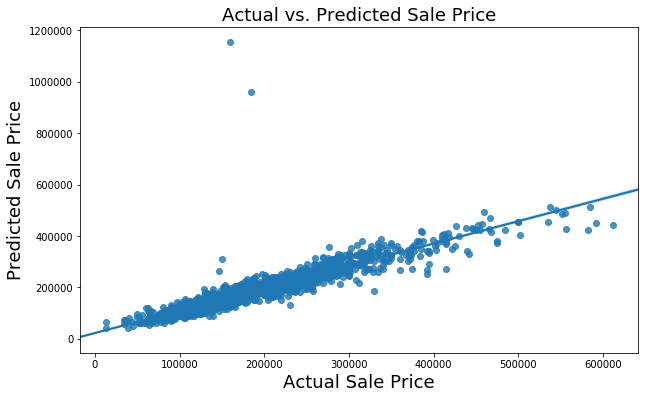

In [263]:
# Look more closely at actual y vs. predicted y
plt.figure(figsize=(10,6))
sns.regplot(dum_houses['SalePrice'], y_hat)
plt.title('Actual vs. Predicted Sale Price', size=18)
plt.ylabel('Predicted Sale Price', size=18)
plt.xlabel('Actual Sale Price', size=18);

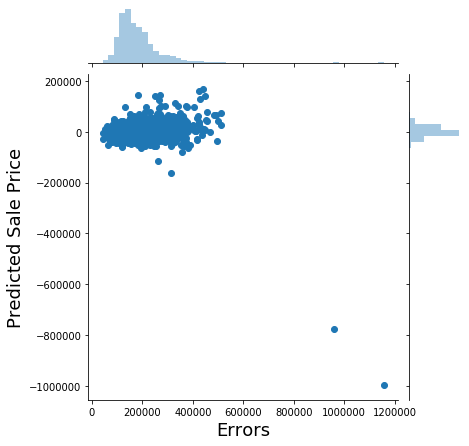

In [264]:
# Plot predicted y vs. residuals & residuals distribution
resids = dum_houses['SalePrice'] - y_hat
sns.jointplot(y_hat, resids).set_axis_labels('Errors', 'Predicted Sale Price', size=18);

In [265]:
# Find the two houses whose predictions were way off & look for discrepancies
pd.set_option('display.max_columns', 10000)
dum_houses.loc[dum_houses['SalePrice_preds'] > 800000, :]

Id        PID  MS SubClass  Lot Frontage  Lot Area Street Alley  \
959   1499  908154235           60         313.0     63887   Pave   N/A   
1882  2181  908154195           20         128.0     39290   Pave   N/A   

     Lot Shape Land Contour  Utilities  Land Slope Condition 1 Condition 2  \
959        IR3          Bnk          4           1       Feedr        Norm   
1882       IR1          Bnk          4           1        Norm        Norm   

      House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
959           2.0            10             5        2008            2008   
1882          1.0            10             5        2008            2009   

     Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
959         Hip   ClyTile       Stucco       Stucco        Stone   
1882        Hip   CompShg      CemntBd      CmentBd        Stone   

      Mas Vnr Area  Exter Qual  Exter Cond Foundation  Bsmt Qual  Bsmt Cond  \
959          796.0           5           3      PConc          5          3   
1882        1224.0           5           3      PConc          5          3   

      Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
959               4            GLQ        5644.0            Unf           0.0   
1882              4            GLQ        4010.0            Unf           0.0   

      Bsmt Unf SF  Total Bsmt SF Heating  Heating QC  Central Air Electrical  \
959         466.0         6110.0    GasA           5            1      SBrkr   
1882       1085.0         5095.0    GasA           5            1      SBrkr   

      1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
959         4692         950                0         5642               2   
1882        5095           0                0         5095               1   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
959                0          2          1              3              1   
1882               1          2          1              2              1   

      Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  \
959              5             12           8           3             4   
1882             5             15           8           2             4   

     Garage Type  Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  \
959       Attchd           2008              3            2       1418.0   
1882      Attchd           2008              3            3       1154.0   

      Garage Qual  Garage Cond  Paved Drive  Wood Deck SF  Open Porch SF  \
959             3            3          1.0           214            292   
1882            3            3          1.0           546            484   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Fence Misc Feature  \
959                0           0             0        480      0          N/A   
1882               0           0             0          0      0         Elev   

      Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  has_garage  has_vnr  \
959          0        1     2008       New     160000           1        1   
1882     17000       10     2007       New     183850           1        1   

      has_bsmt  has_alley  has_fireplace  has_pool  has_fence  zone_C (all)  \
959          1          0              1         1          0             0   
1882         1          0              1         0          0             0   

      zone_FV  zone_I (all)  zone_RH  zone_RL  zone_RM  lot_config_CulDSac  \
959         0             0        0        1        0                   0   
1882        0             0        0        1        0                   0   

      lot_config_FR2  lot_config_FR3  lot_config_Inside  neighborhood_Blueste  \
959                0               0                  0                     0   
1882               0               0                  1                     0   

      neighborhood_BrDale  neighborhood_Brk

In [266]:
dum_houses.loc[(dum_houses['Yr Sold'] <= dum_houses['Year Remod/Add']), ['Yr Sold', 'Year Remod/Add', 'SalePrice', 'SalePrice_preds']]

Yr Sold  Year Remod/Add  SalePrice  SalePrice_preds
6        2006            2006     140000    149929.148922
22       2006            2006     344133    302822.543265
41       2006            2006     465000    425595.455255
61       2007            2007     303477    294394.570656
65       2007            2007     147000    126258.267259
...       ...             ...        ...              ...
1961     2007            2007     591587    449887.108346
1999     2008            2008     372402    310277.252879
2009     2007            2007     250000    246228.700067
2022     2006            2006     298236    309793.936645
2042     2008            2008     394617    340741.305059

[163 rows x 4 columns]

In [267]:
dum_houses['zone_RL'].value_counts()

1    1597
0     451
Name: zone_RL, dtype: int64

Both of these houses are large with well-rated amenities all around. The only potential downside is their location in a rural area, so they may be further from transportation/conveniences. However, the majority of these houses (~78%) are in rural locations, and the model predicts their prices fairly well. There may have potentially been some extranneous factor affecting these two houses' low sale prices, such as seller/buyer relationship, recent crime in the area, surrounding farmland being untenable, or perhaps an agreement that the new buyer pay back taxes. I am choosing to remove these two houses from the data and rerun the highest performing models below on the basis that these two prices are a result of the "Joe Biden Effect" of Ames Housing Prices.

## Finetune and evaluate model

### Drop outlier rows

In [268]:
dum_houses.drop([959, 1882], axis=0, inplace=True)

In [269]:
# edit_mlm --> highest on Kaggle, ninth submission, uses edited_features + log
# elevenb_mlr --> highest train/test score, twelfth submission, 
# not good on Kaggle, uses new_filtered_features + log

### Rerun highest scoring model

In [270]:
# Redefine X and y
X = dum_houses[edited_features]
y = np.log(dum_houses['SalePrice'])

# Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Reinstantiate model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Get train R^2 score
best_model.score(X_train, y_train)

0.8955843763869484

In [271]:
# Get test R^2 score
best_model.score(X_test, y_test)

0.8975678886979789

In [272]:
# Get cross val score
cross_val_score(best_model, X_train, y_train, cv=5).mean()

0.8873533095569389

### Sixteenth Kaggle submission

In [273]:
best_test_X = test[edited_features]

In [274]:
best_test_y_preds = np.exp(edit_mlm.predict(best_test_X))

In [275]:
sixteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': best_test_y_preds})

In [276]:
sixteenth.to_csv('./datasets/16_submission.csv', index=False)

### Visualize results

In [277]:
y_hat = np.exp(best_model.predict(X))
resids = y_hat - dum_houses['SalePrice']

In [278]:
# Median absolute prediction error
np.median(np.abs(resids / dum_houses['SalePrice'])) * 100

6.79373095085772

Text(0.5, 1, 'Is there Equality of Variance?')

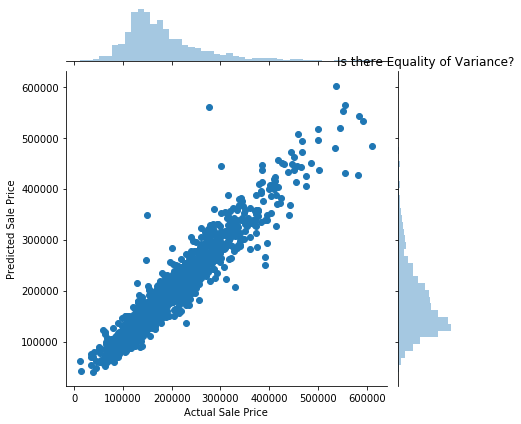

In [279]:
sns.jointplot(dum_houses['SalePrice'], y_hat).set_axis_labels('Actual Sale Price', 'Predicted Sale Price');
plt.title('Is there Equality of Variance?')


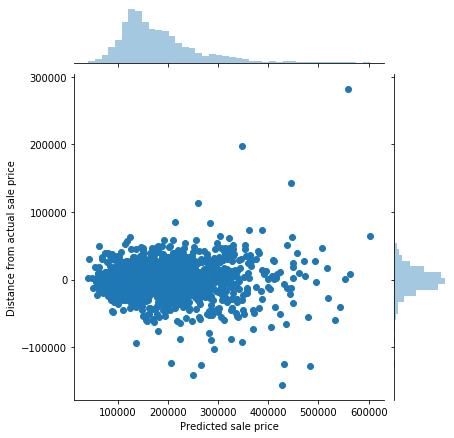

In [280]:
sns.jointplot(y_hat, resids).set_axis_labels('Predicted sale price', 'Distance from actual sale price');

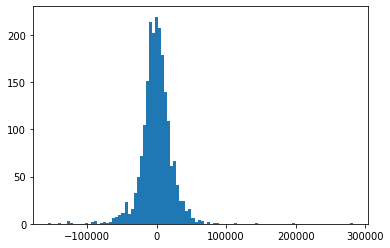

In [281]:
# Check residuals distribution again
plt.hist(resids, bins=100);

In [282]:
print(f'Error mean: {resids.mean()}')
print(f'Mean squared error: {metrics.mean_squared_error(np.exp(y), y_hat)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(np.exp(y), y_hat))}')

Error mean: -573.600665341513
Mean squared error: 532498048.5829241
RMSE: 23075.919235924797


### Simplify model and retest

In [283]:
# Redefine X and y
X = dum_houses[edited_features]
X = sm.add_constant(X)

y = np.log(dum_houses['SalePrice'])

# Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit the model
model = sm.OLS(y, X).fit()

# Summary statistics
model.summary()

/Users/kelly/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     488.5
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:11:39   Log-Likelihood:                 1245.1
No. Observations:                2046   AIC:                            -2416.
Df Residuals:                    2009   BIC:                            -2208.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.6706      0.539     12.373      0.000       5.613       7.728
neighborhood_StoneBr     0.0474      0.023      2.030      0.042       0.002       0.093
neighborhood_NridgHt     0.0349      0.015      2.289      0.022       0.005       0.065
neighborhood_NoRidge     0.0128      0.022      0.587      0.557      -0.030       0.055
zone_RM                 -0.0564      0.015     -3.783      0.000      -0.086      -0.027
zone_RL                  0.0147      0.013      1.128      0.260      -0.011       0.040
has_fireplace           -0.0083      0.021     -0.400      0.689      -0.049       0.032
has_garage              -0.2621      0.053     -4.951      0.000      -0.366      -0.158
Lot Frontage          -3.49e-05      0.000     -0.235      0.814      -0.000       0.000
Lot Area              4.075e-06   7.68e-07      5.305      0.000    2.57e-06    5.58e-06
Overall Qual             0.0756      0.004     18.503      0.000       0.068       0.084
Year Built               0.0004      0.000      2.032      0.042    1.52e-05       0.001
Year Remod/Add           0.0017      0.000      7.527      0.000       0.001       0.002
Mas Vnr Area          4.015e-06   2.07e-05      0.194      0.846   -3.66e-05    4.47e-05
Exter Qual               0.0217      0.009      2.373      0.018       0.004       0.040
Bsmt Qual                0.0118      0.006      2.020      0.044       0.000       0.023
Bsmt Exposure            0.0131      0.003      3.866      0.000       0.006       0.020
Bsmt Unf SF            -8.4e-05   1.02e-05     -8.220      0.000      -0.000    -6.4e-05
Total Bsmt SF            0.0002   1.68e-05      9.395      0.000       0.000       0.000
Heating QC               0.0245      0.004      6.094      0.000       0.017       0.032
Central Air              0.0967      0.014      6.995      0.000       0.070       0.124
1st Flr SF               0.0002   6.22e-05      2.875      0.004    5.68e-05       0.000
2nd Flr SF               0.0002   6.02e-05      2.551      0.011    3.55e-05       0.000
Gr Liv Area           7.117e-05   6.05e-05      1.177      0.239   -4.75e-05       0.000
Bsmt Full Bath           0.0184      0.008      2.322      0.020       0.003       0.034
Full Bath                0.0025      0.008      0.300      0.764      -0.014       0.018
Kitchen Qual             0.0325      0.007      4.428      0.000       0.018       0.047
TotRms AbvGrd            0.0065      0.003      1.862      0.063      -0.000       0.013
Fireplace Qu             0.0137      0.006      2.331      0.020       0.002       0.025
Garage Yr Blt           -0.0003      0.000     -1.075      0.282      -0.001       0.000
Garage Finish            0.0051      0.005      1.033      0.302      -0.005       0.015
Garage Cars              0.0267      0.007      3.881    

In [284]:
final_features = [var for var in edited_features if (model.pvalues[var] < 0.05)]
final_features

['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'zone_RM',
 'has_garage',
 'Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Bsmt Full Bath',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Cars',
 'Garage Cond',
 'Paved Drive']

In [285]:
# Redefine X and y
X = dum_houses[final_features]
y = np.log(dum_houses['SalePrice'])

# Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit model
final_mod = LinearRegression()
final_mod.fit(X_train, y_train)

# Train R^2 score
final_mod.score(X_train, y_train)

0.8948129084456641

In [286]:
# Test R^2 score
final_mod.score(X_test, y_test)

0.8976669708460256

In [287]:
# Cross val score
cross_val_score(final_mod, X_train, y_train, cv=5).mean()

0.889562670869298

### Seventeenth Kaggle submission

In [288]:
last_test_X = test[final_features]

In [289]:
last_test_y_preds = np.exp(final_mod.predict(last_test_X))

In [290]:
seventeenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': last_test_y_preds})

In [291]:
seventeenth.to_csv('./datasets/17_submission.csv', index=False)

### Lasso version of final model

In [292]:
# Use Lasso on the same model above, same X and y

In [293]:
# Redefine X and y
X = dum_houses[final_features]
y = dum_houses['SalePrice']

# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)
# Standardize data
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)


In [294]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(2, 3, 100)

# Cross-validate over our list of Lasso alphas.
lasso2 = LassoCV(
    alphas=lasso_alphas, 
    cv=5, 
    max_iter=5000 # default=1000, bad idea
)

# Fit model using best ridge alpha!
lasso2.fit(Z_train, y_train);

In [295]:
lasso2.alpha_

112.33240329780277

In [296]:
lasso2.coef_

array([ 5475.16141672,  7531.89027541, -1099.66505987, -1315.70620289,
        6315.96173916, 16430.06402154,  2521.95175595,  2512.75685038,
        8044.89541249,   227.59263112,  4497.58111792, -9613.07231244,
       15525.84124913,  2718.69829865,  -788.35435073, 21058.56064865,
       21564.87499469,   333.56987475,  6924.8566616 ,  3243.89236808,
        4580.08198642,     0.        ,  1349.88564795])

In [297]:
lasso2.score(Z_train, y_train)

0.8869862137155242

In [298]:
lasso2.score(Z_test, y_test)

0.8704257169180898

### Eighteenth Kaggle submission

In [299]:
test_X = test[final_features]

# Standardize data
test_Z = ss.fit_transform(test_X)

In [300]:
lasso2_test_y_preds = lasso2.predict(test_Z)

In [301]:
lasso2_test_y_preds

array([146217.81179141, 180247.88583521, 223036.88009273, 113709.4228153 ,
       172966.42040935,  85725.83625141,  94644.79245343, 149076.46092579,
       198317.96766857, 166468.99318512, 174302.62896492, 121946.35769052,
       157237.8476468 , 275166.66233353, 165843.83490202, 118694.78804561,
       154356.6636759 , 112327.57634613, 199178.69906627, 215140.92208412,
       156569.48017937, 118774.36539709, 227179.54968363, 173042.57905382,
       187819.01933072, 110062.19750424, 138203.18883922, 143733.6290733 ,
       168691.8412706 ,  33278.69991331,  87539.03436074,  78028.58055482,
       258660.69194548, 168300.88124621, 217239.66170369, 174582.56675382,
       118532.83943211,  61569.85443025, 128841.67274078, 194527.59979508,
       168479.46121458, 216944.87002469, 153854.11147128, 174266.73673344,
       236234.52122028, 102605.56329679, 230929.09921688, 114870.26657565,
       116625.60133922, 120028.51233993, 115446.79580758, 219522.52186897,
       249677.04727383, 1

In [302]:
eighteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso2_test_y_preds})

In [303]:
eighteenth.to_csv('./datasets/18_submission.csv', index=False)

### Standardized version of final model

In [304]:
# Redefine X and y
X = dum_houses[final_features]
y = np.log(dum_houses['SalePrice'])

# Train test split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)
# Restandardize X and y
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [305]:
# Instantiate a new model to fit to the data
ss_mlr = LinearRegression()
ss_mlr.fit(Z_train, y_train)

# Get train R^2 score
ss_mlr.score(Z_train, y_train)

0.8948129084456641

In [306]:
# Get test R^2 score
ss_mlr.score(Z_test, y_test)

0.8976669708460288

In [307]:
# Get cross val score
cross_val_score(ss_mlr, Z_train, y_train, cv=5).mean()

0.8895626708692979

In [308]:
# Look at coefficients
sorted(list(zip(ss_mlr.coef_, final_features)))

[(-0.05394509091957676, 'has_garage'),
 (-0.034118766655004525, 'Bsmt Unf SF'),
 (-0.019144796600475095, 'zone_RM'),
 (0.003862967385628166, 'neighborhood_StoneBr'),
 (0.0089264179213728, 'Bsmt Qual'),
 (0.010313385700766595, 'neighborhood_NridgHt'),
 (0.011929498405246798, 'Year Built'),
 (0.012358612949700325, 'Bsmt Full Bath'),
 (0.013089092620862455, 'Exter Qual'),
 (0.013918112954440776, 'Bsmt Exposure'),
 (0.014005308988346298, 'Garage Cars'),
 (0.018569647628057868, 'Fireplace Qu'),
 (0.01962445225153253, 'Heating QC'),
 (0.02267097518189834, 'Kitchen Qual'),
 (0.024172692684168093, 'Central Air'),
 (0.02776804256898344, 'Paved Drive'),
 (0.030180944449860758, 'Lot Area'),
 (0.03688168977727989, 'Year Remod/Add'),
 (0.06513696802700882, 'Total Bsmt SF'),
 (0.06759848915304677, 'Garage Cond'),
 (0.10345618102115983, '1st Flr SF'),
 (0.10953225238555656, '2nd Flr SF'),
 (0.11072552242050644, 'Overall Qual')]

### Nineteenth Kaggle submission

In [309]:
ss_y_preds = np.exp(ss_mlr.predict(test_Z))

In [310]:
ss_y_preds

array([104380.44994773, 171990.21121301, 216922.64302486, 107928.5875649 ,
       168817.77147371, 100660.43823115, 110144.24246658, 145284.20223124,
       193249.01370442, 158335.14259714, 162004.15491227, 128966.50824286,
       153809.63500405, 303156.34139752, 151008.38882491, 131168.1932161 ,
       141579.09555324, 121574.55919263, 193633.60154433, 191659.04793524,
       155404.80083926, 124832.62080562, 212677.77121852, 163525.89387667,
       183079.04724067, 117692.31272912, 144001.97972597, 103346.16196177,
       156528.41716737,  62000.39084976, 104765.41509662,  93436.13901833,
       199609.27553028, 159535.40790608, 209396.17104052, 180652.71238214,
        91514.70399294,  82098.32188639, 125103.14768883, 187775.96436426,
       161293.28180293, 210137.50612357, 153440.69835205, 165642.38414659,
       222667.57344186, 108932.10538671, 226714.70724161, 123683.62203529,
       131687.57570142, 124289.70684519, 105859.95574668, 191901.31787334,
       248749.53702109, 1

In [311]:
nineteenth = pd.DataFrame({'Id': test['Id'], 'SalePrice': ss_y_preds})

In [312]:
nineteenth.to_csv('./datasets/19_submission.csv', index=False)

Because the lasso and standardized versions of this model both performed more poorly on predicting from the test data, we will continue to evalutate the linear regression model.

### Experiment models: (1) final_features + zones and (2) all numeric data

#### final_features + all zone dummy columns

In [313]:
# Add all zone dummy columns to the features list
zone_features = final_features.copy()

for col in dum_houses.columns:
    if ('zone' in col) and ('lot_area' not in col) and (col not in final_features):
        zone_features.append(col)
        print(col)

zone_C (all)
zone_FV
zone_I (all)
zone_RH
zone_RL


In [314]:
# Redefine X and y
X = dum_houses[zone_features]
y = np.log(dum_houses['SalePrice'])

# Instantiate and fit new model
mylm = LinearRegression()
mylm.fit(X, y)

# Get R^2 score for full train dataset
mylm.score(X,y)

0.9016360095025355

### Twentieth Kaggle submission

In [315]:
# Add a 'zone_C (all)' column of 0s for test data
test['zone_C (all)'] = [0 for i in range(0, test.shape[0])]

# Define test X and predict y
test_X = test[zone_features]
test_y = np.exp(mylm.predict(test_X))

# Export results
twentieth = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y})
twentieth.to_csv('./datasets/20_submission.csv', index=False)

#### All numeric data

In [316]:
# Define new features as all numeric data besides sale price, sale price predictions, and identifying numbers
these_feats = dum_houses._get_numeric_data().drop(columns=['SalePrice', 'SalePrice_preds', 'PID', 'Id'])

for col in these_feats.columns:
    if col not in test.columns:
        these_feats.drop(columns=col, inplace=True)

# Redefine X and y        
X = dum_houses[these_feats.columns]
y = np.log(dum_houses['SalePrice'])

# Instantiate and fit new model
newlm = LinearRegression()
newlm.fit(X, y)

# Get R^2 score for full train dataset
newlm.score(X,y)

0.9275986941753639

### Twenty-first Kaggle submission

In [317]:
# Define test X and predict y
test_X = test[these_feats.columns]
test_y = np.exp(newlm.predict(test_X))

# Export results
twentyfirst = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_y})
twentyfirst.to_csv('./datasets/21_submission.csv', index=False)


# Model finetuning and final evaluation

### Rerun simplest, highest performing model

In [318]:
# Redefine X and y
X = dum_houses[final_features]
y = np.log(dum_houses['SalePrice'])

# Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit model
final_mod = LinearRegression()
final_mod.fit(X_train, y_train)

# Train R^2 score
final_mod.score(X_train, y_train)

0.8948129084456641

In [319]:
# Test R^2 score
final_mod.score(X_test, y_test)

0.8976669708460256

In [320]:
# Cross val score
cross_val_score(final_mod, X_train, y_train, cv=5).mean()

0.889562670869298

### Visualize results

In [321]:
len(final_features)

23

In [322]:
y_predictions = np.exp(final_mod.predict(X))
errors = dum_houses['SalePrice'] - y_predictions

In [323]:
print(f'Error mean: {errors.mean()}')
print(f'Mean squared error: {metrics.mean_squared_error(np.exp(y), y_predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(np.exp(y), y_predictions))}')

Error mean: 587.9386074850509
Mean squared error: 537726574.8870145
RMSE: 23188.932163577832


In [324]:
# Median absolute prediction error
np.median(np.abs(errors / dum_houses['SalePrice'])) * 100

6.723764015301659

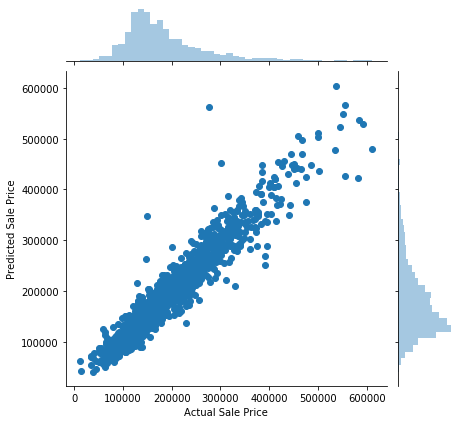

In [325]:
# Does our model meet the assumption of Equality of Variance?
sns.jointplot(dum_houses['SalePrice'], y_predictions).set_axis_labels('Actual Sale Price', 'Predicted Sale Price');


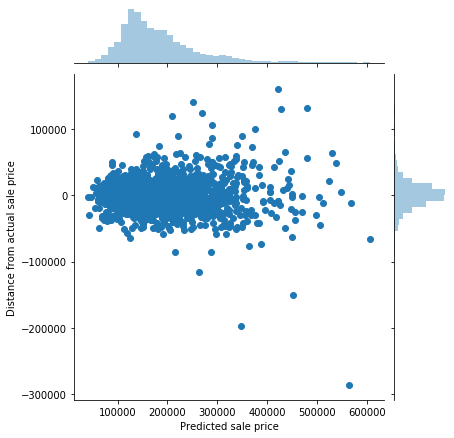

In [326]:
# Does our model meet the assumption of Normally Distributed Errors?
sns.jointplot(y_predictions, errors).set_axis_labels('Predicted sale price', 'Distance from actual sale price');


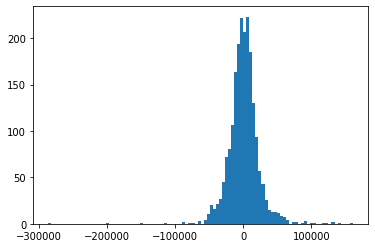

In [327]:
# Check residuals distribution again - Are the errors normally distributed?
plt.hist(errors, bins=100);

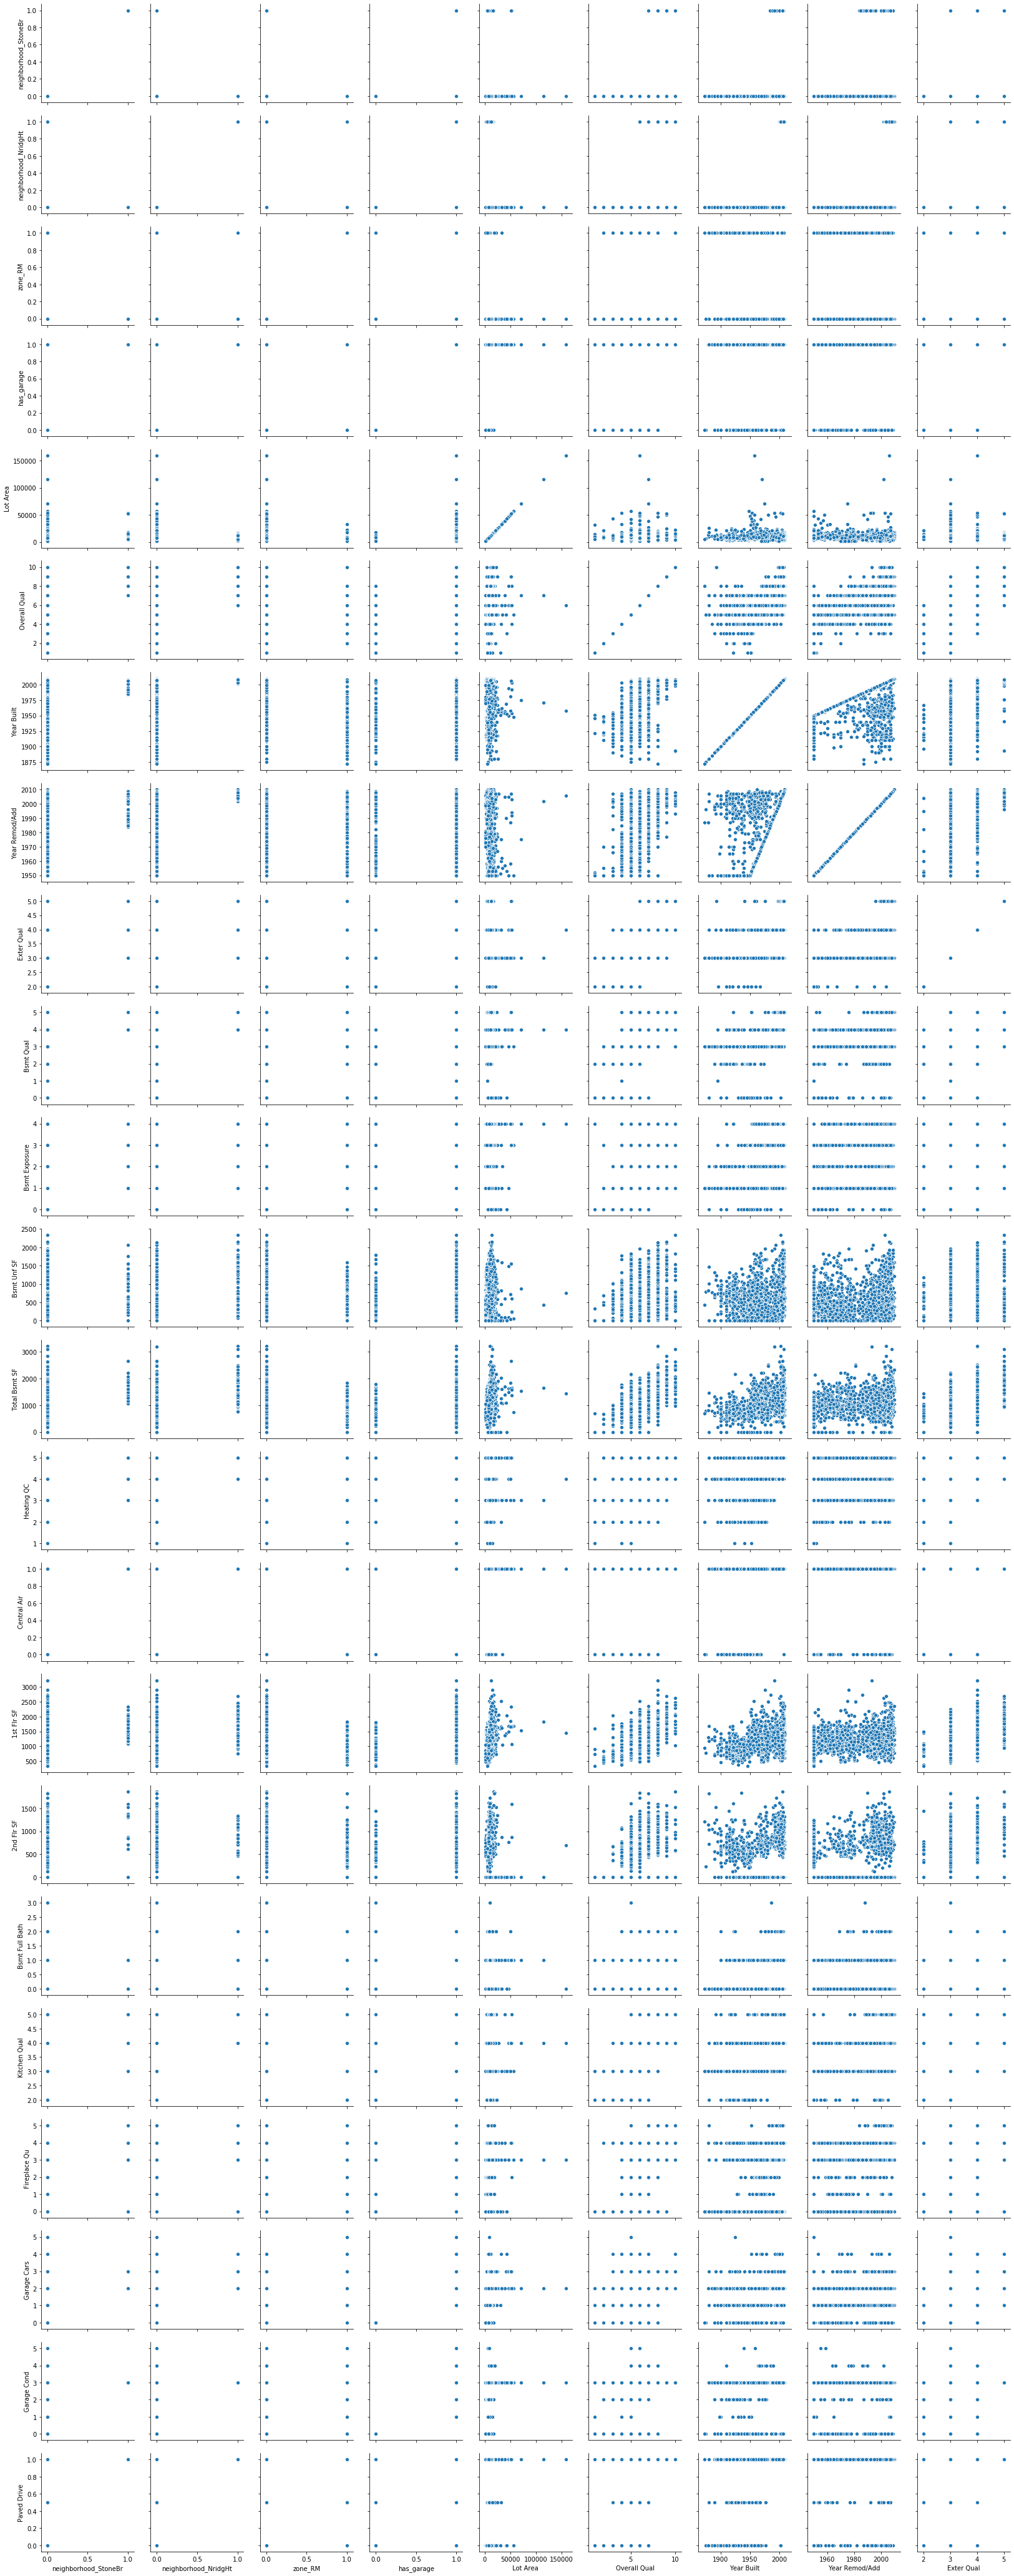

In [328]:
# Does our model meet the assumption of Independence of Variables?
sns.pairplot(dum_houses, x_vars=final_features[:9], y_vars=final_features);

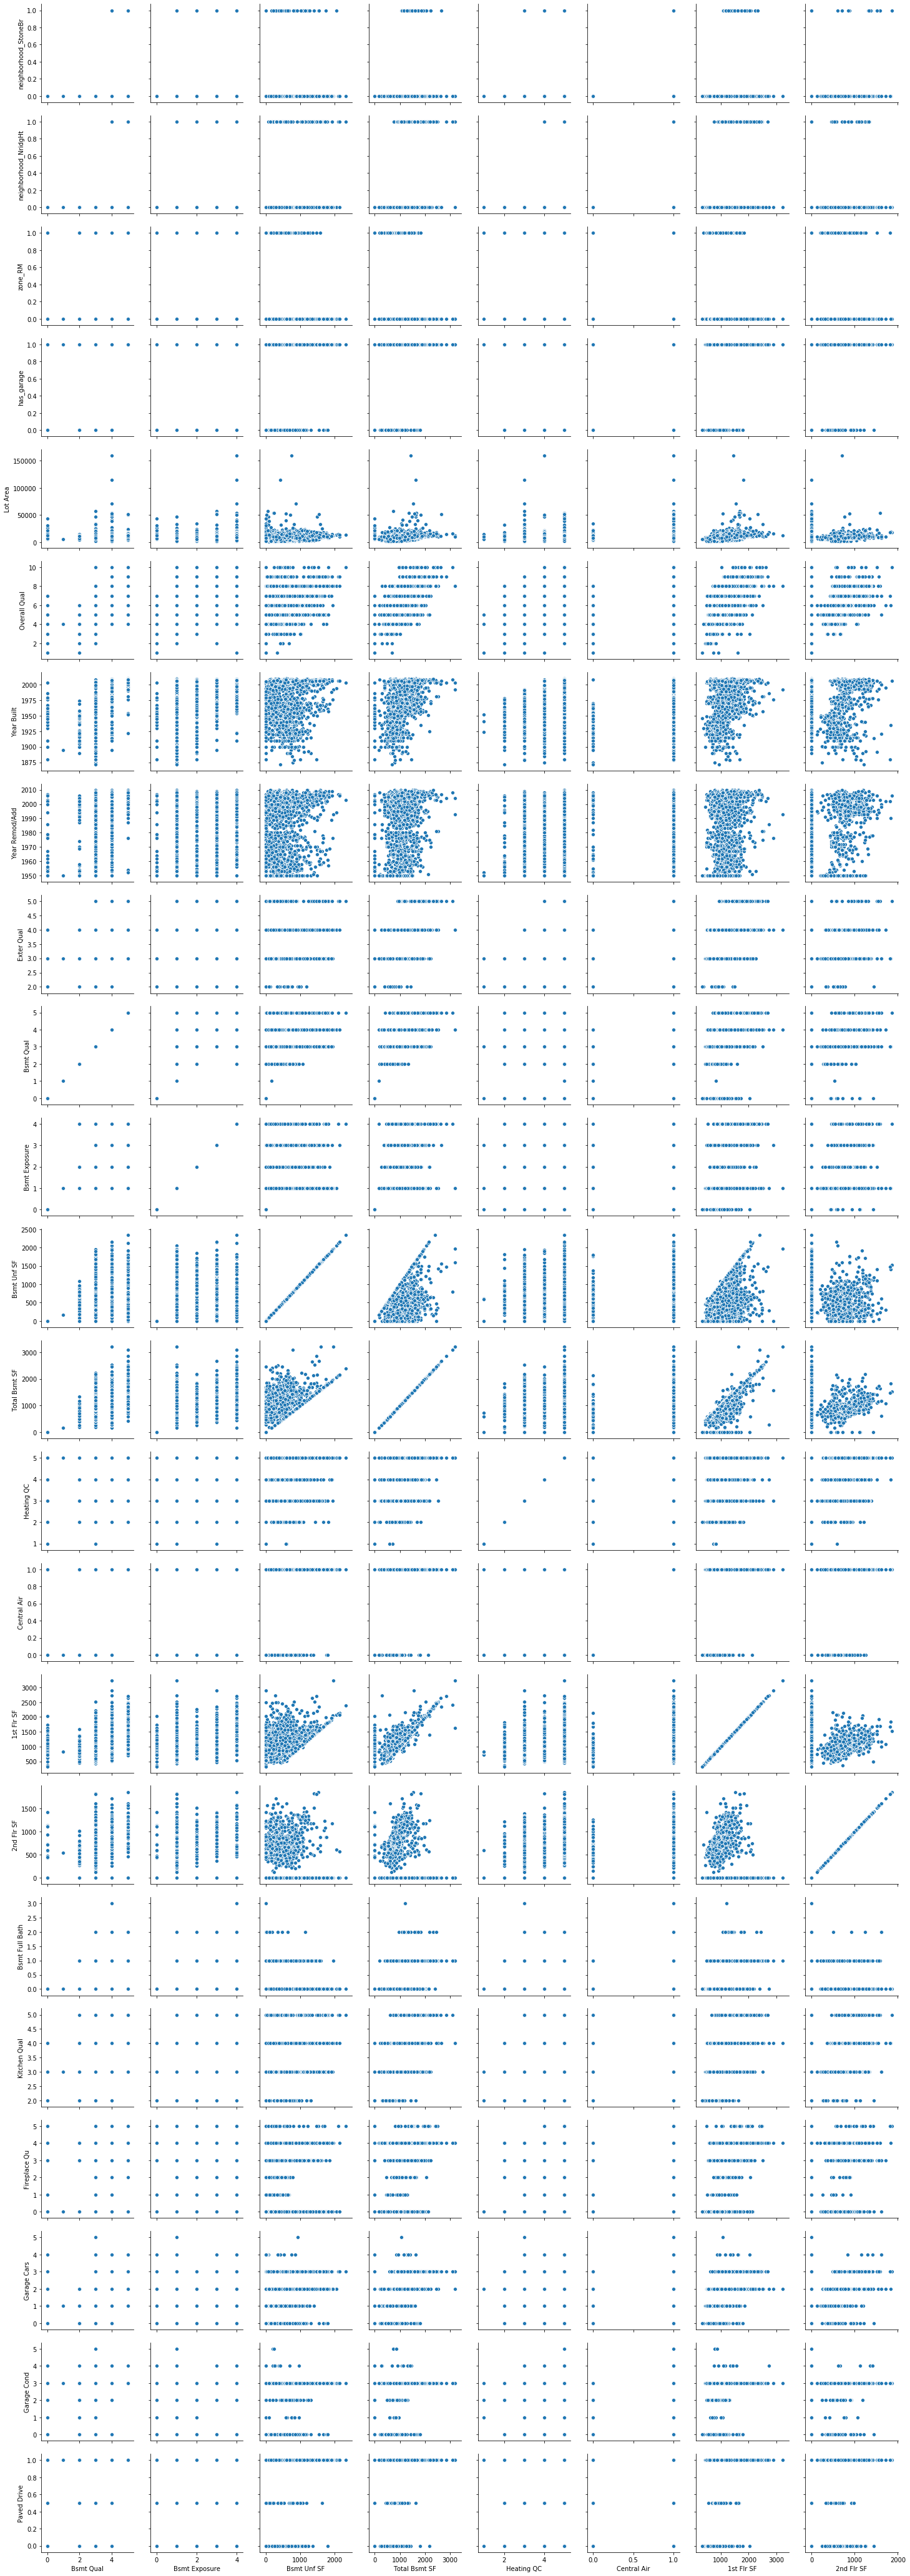

In [329]:
sns.pairplot(dum_houses, x_vars=final_features[9:17], y_vars=final_features);

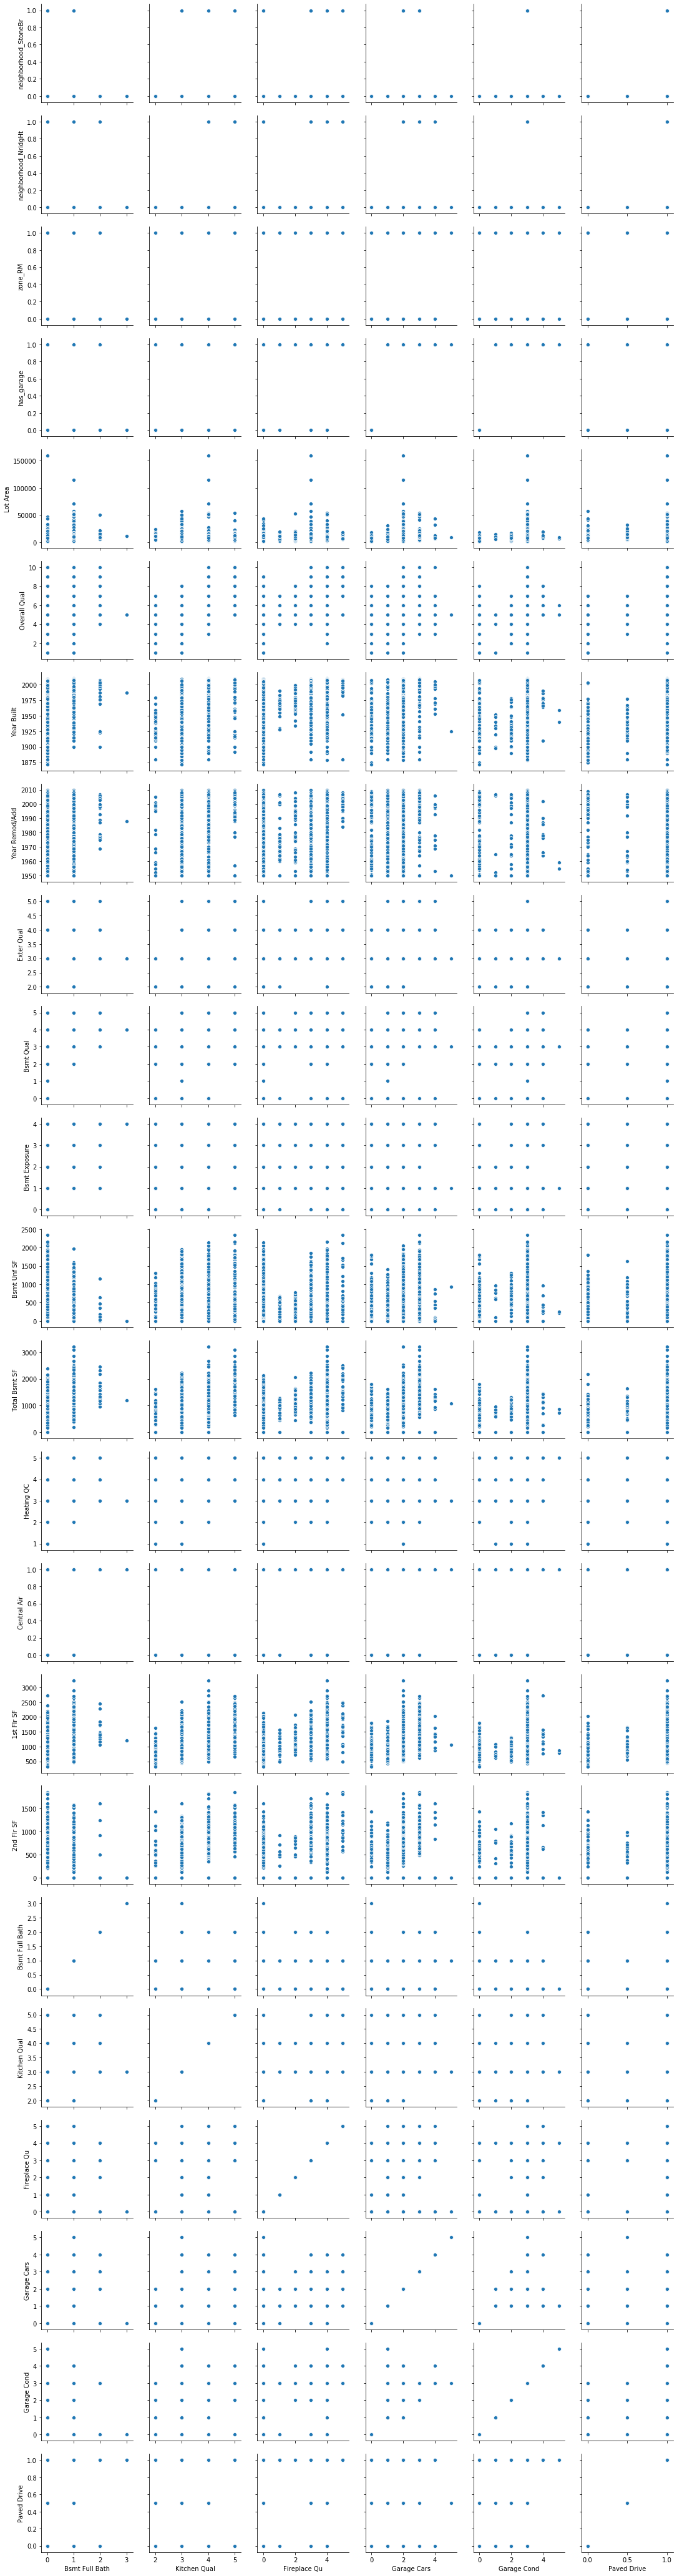

In [330]:
sns.pairplot(dum_houses, x_vars=final_features[17:], y_vars=final_features);

/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


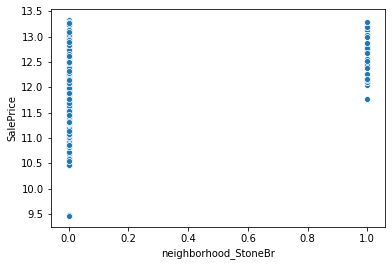

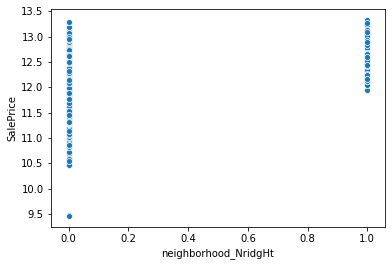

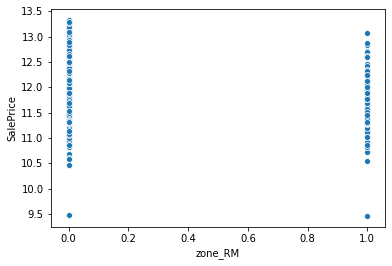

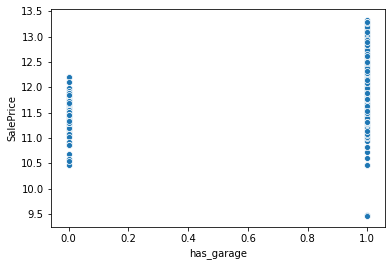

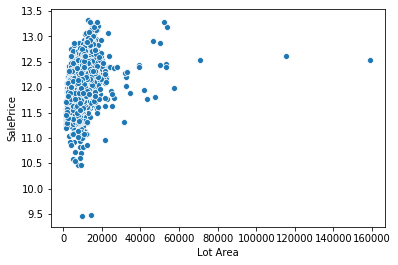

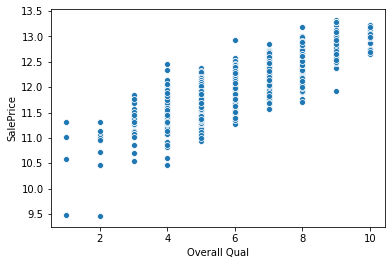

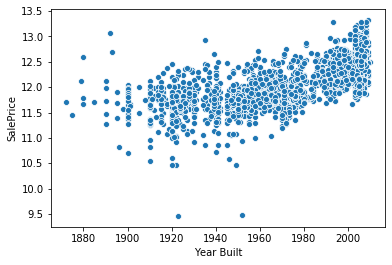

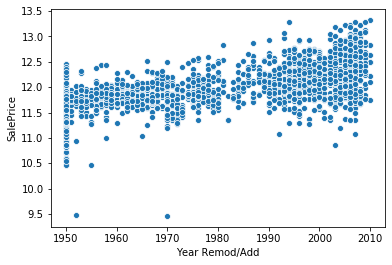

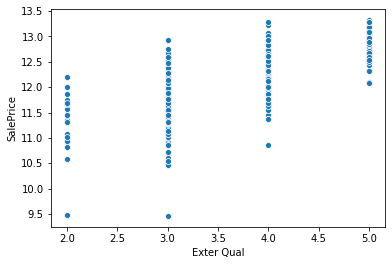

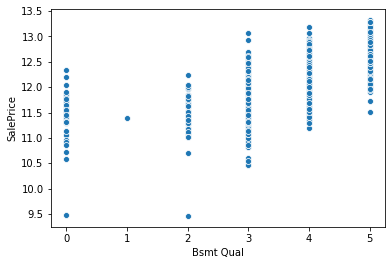

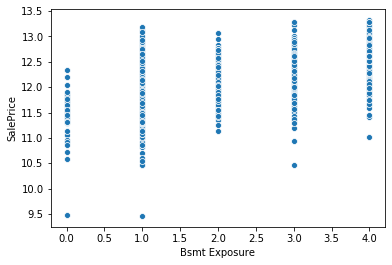

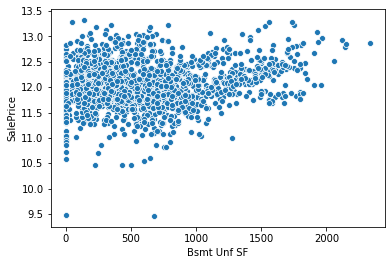

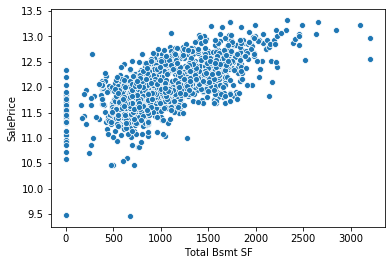

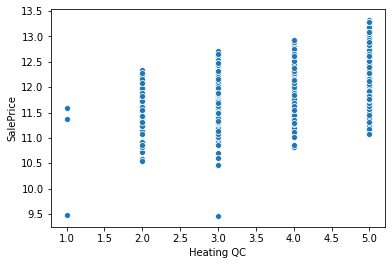

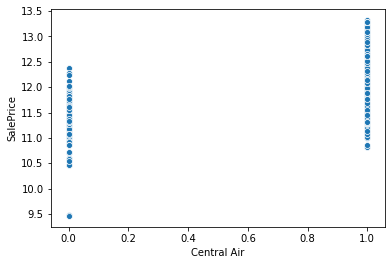

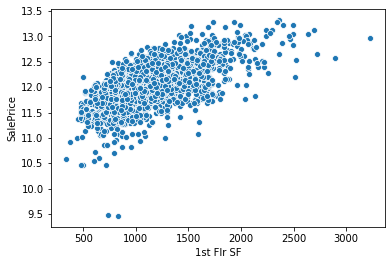

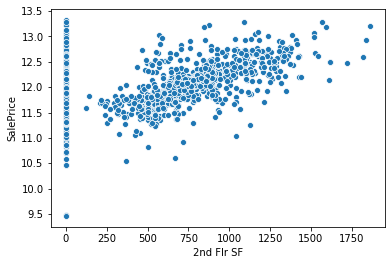

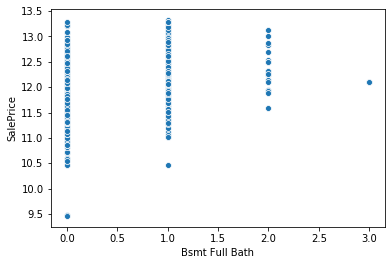

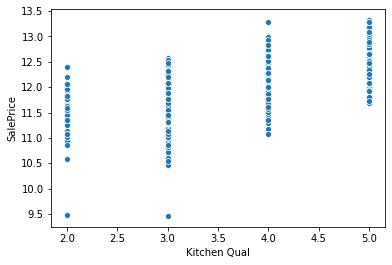

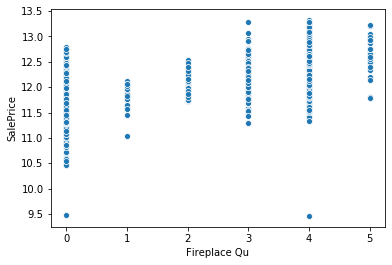

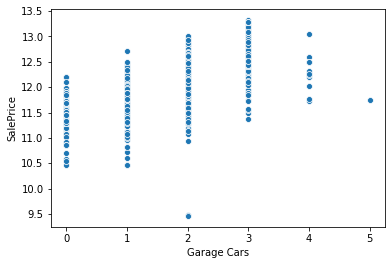

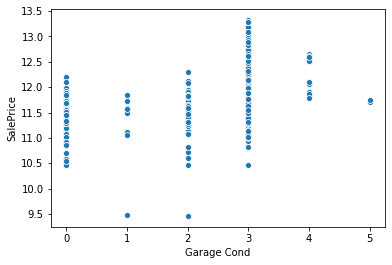

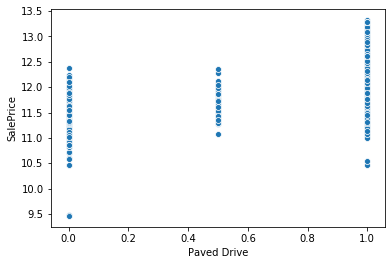

In [331]:
# Does our model meet the assumption of Linearity?
for col in final_features:
    plt.figure()
    sns.scatterplot(dum_houses[col], np.log(dum_houses['SalePrice']));
    

/Users/kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


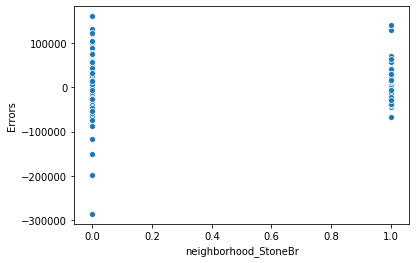

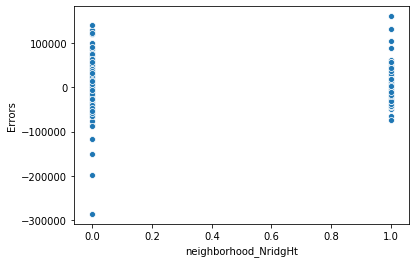

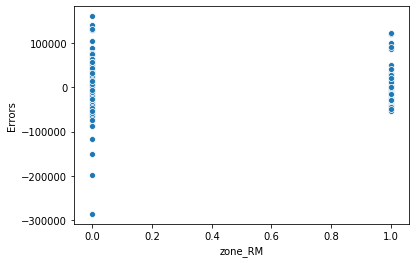

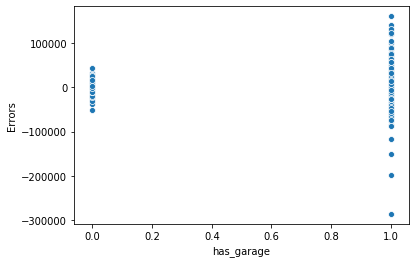

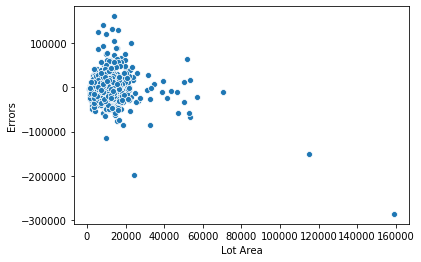

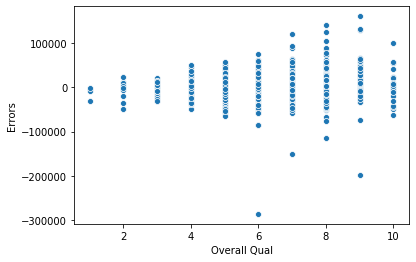

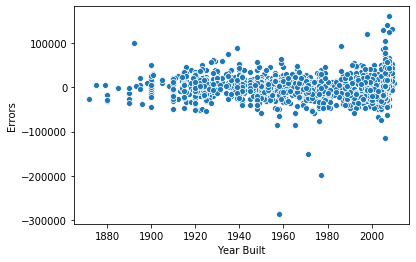

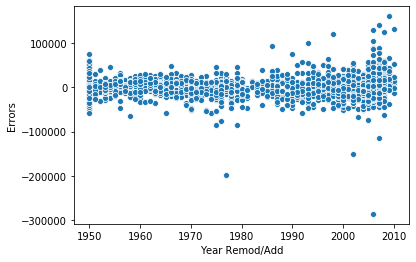

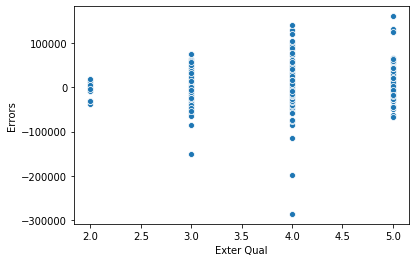

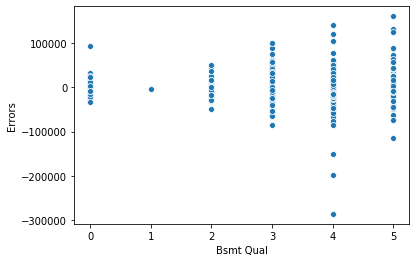

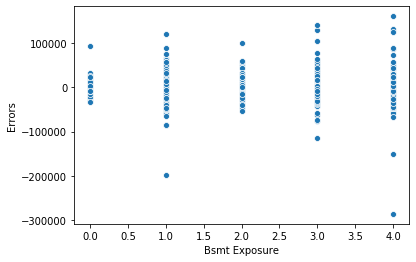

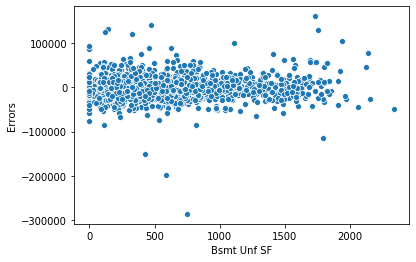

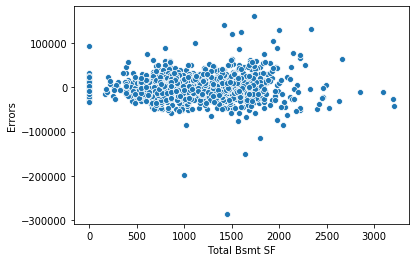

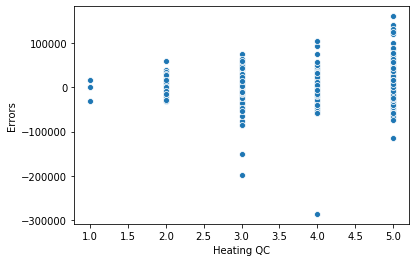

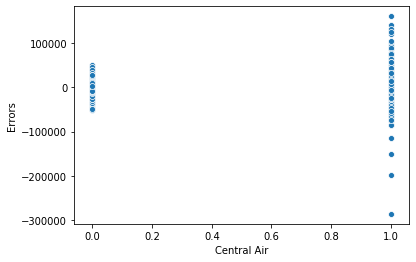

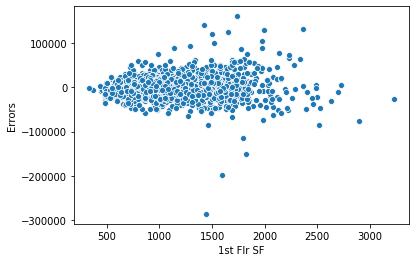

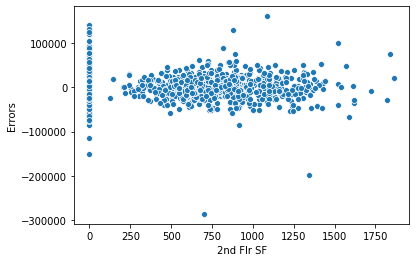

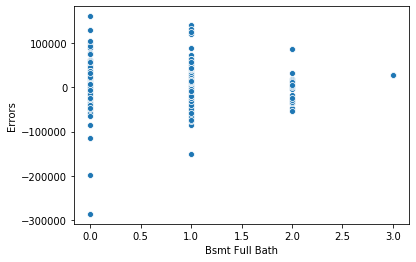

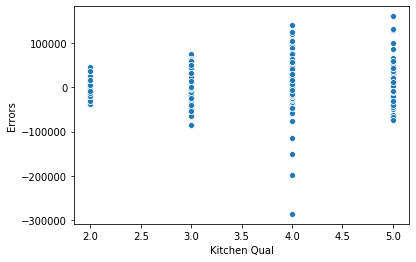

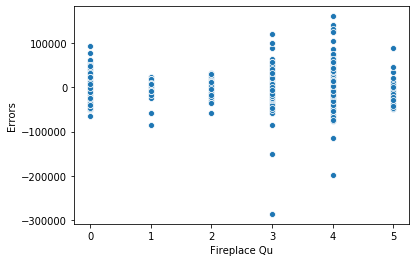

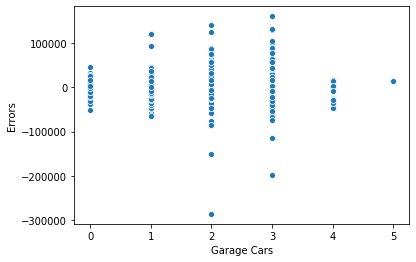

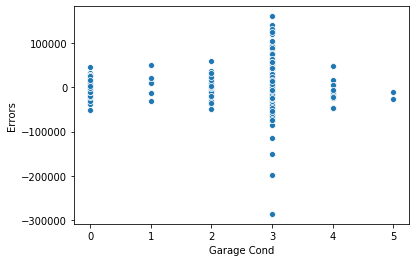

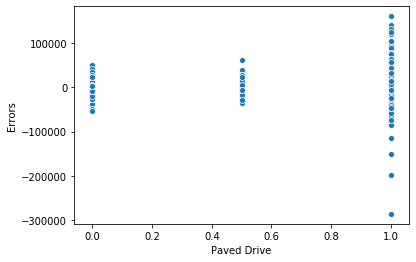

In [332]:
# Does our model meet the assumption of Independence of Errors?
for col in final_features:
    plt.figure()
    sns.scatterplot(dum_houses[col], errors)
    plt.ylabel('Errors');

**Assumptions of Multiple Linear Regression**

_Linearity:_ From the scatterplots above, all features chosen for the model look to have an approximate linear relationship with sale price (though this is harder to determine for discrete values).

_Independence of Errors:_ From the scatterplots above, we see that some errors do have a non-random relationship with features used in the model. Thus it is not safe to say this model meets the assumption of independence of errors, however, 

_Normality of Errors:_ The errors from this model are slightly right-skewed (mean ~= -573.6), however their distribution is relatively normal, as seen in the histogram above.

_Equality of Variance (Homoscedasticity):_ The errors from this model are homoscedastic, as seen in the jointplot above.

_Independence of Variables:_ From the pairplots above, we see that while some of the variables are colinear, this model sought to account for that by testing interaction terms, for example with the three basement square feet columns.


In [333]:
# Set new column in dum_houses with predicitons from best_model
dum_houses['SalePrice_preds'] = y_hat

# Set new column in dum_houses with errors from best_model
dum_houses['errors'] = errors

## Model exploration

In [334]:
# Look at features / variables used again
final_features

['neighborhood_StoneBr',
 'neighborhood_NridgHt',
 'zone_RM',
 'has_garage',
 'Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Exposure',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Bsmt Full Bath',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Cars',
 'Garage Cond',
 'Paved Drive']

In [335]:
# See how 'Garage Cars' and 'Garage Cond' interact to predict sale price
dum_houses.groupby(['Garage Cars', 'Garage Cond'])['SalePrice', 'SalePrice_preds'].mean()


SalePrice  SalePrice_preds
Garage Cars Garage Cond                                
0           0            105669.150442    105408.382443
1           1             92160.000000     87774.126678
            2             99829.137931     93159.198802
            3            128849.981443    128204.555578
            4            140500.000000    155857.832896
            5            124000.000000    146272.173008
2           1             86200.000000     77555.388907
            2            122949.312500    118449.243004
            3            184956.354430    185420.697880
            4            214985.555556    221970.167404
3           2             92500.000000     89407.788227
            3            311533.892308    306548.243088
4           3            224416.666667    233839.836847
            4            292500.000000    330768.004479
5           3            126500.000000    108125.714445

It appears that size of garage ('Garage Cars') follows a law of diminishing returns--highest mean price is for a 3-car garage with 3/5 condition (though this could be due to other aspects of the houses with 3 vs. 5 cars).

In [336]:
# See how 'Lot Area' relates to actual sale price to predict sale price
dum_houses.groupby(['Lot Area'])['SalePrice', 'SalePrice_preds'].mean().T


Lot Area                1300          1470          1476           1477    \
SalePrice        124000.000000  73000.000000  76000.000000   98000.000000   
SalePrice_preds  127611.657654  87351.257554  94344.888983  120059.836349   

Lot Area               1484          1495          1504           1533    \
SalePrice        79400.000000  93900.000000  85500.000000   97025.000000   
SalePrice_preds  89067.291262  95679.567888  96924.903192  100515.854594   

Lot Area               1596           1612           1680           1700    \
SalePrice         92950.00000  121000.000000  100039.285714  148400.000000   
SalePrice_preds  103849.31688  125080.751119  112189.229099  175059.001077   

Lot Area                1782           1869           1890           1920    \
SalePrice        123900.000000  106000.000000   98500.000000  122500.000000   
SalePrice_preds  123952.589174  109614.621911  103445.683775  128408.501964   

Lot Area               1936           1950           1974          2001    \
SalePrice        87500.000000  151000.000000  105000.000000  75000.000000   
SalePrice_preds  90357.278329  149602.398809  112786.560147  93651.213946   

Lot Area                2117           2160           2205           2217    \
SalePrice        177166.666667  160000.000000  113500.000000   88000.000000   
SalePrice_preds  166563.635037  168449.448804  115838.699219  101029.580653   

Lot Area                2280           2289           2304           2308    \
SalePrice        147828.571429  148500.000000  142500.000000  148333.333333   
SalePrice_preds  150103.692284  144640.513069  142381.472962  150607.954519   

Lot Area                2349           2364           2403           2448    \
SalePrice        137900.000000  142500.000000  147110.000000  154500.000000   
SalePrice_preds  146618.577683  150340.685459  155422.963696  194966.406014   

Lot Area                2500           2522           2529           2544    \
SalePrice        155000.000000  133833.333333  148500.000000  149633.333333   
SalePrice_preds  174892.794936  178267.341213  138712.984775  161973.493695   

Lot Area                2592           2628           2645           2651    \
SalePrice         85000.000000  175500.000000  181333.333333  165000.000000   
SalePrice_preds  108699.211192  188295.936579  202554.354241  179676.343878   

Lot Area                2665           2760           2887           2938    \
SalePrice        123833.333333  105500.000000  173000.000000  246990.000000   
SalePrice_preds  124738.101933  114967.452493  181933.405542  217955.282397   

Lot Area                2998           3000           3010           3013    \
SalePrice        173000.000000  118116.500000  167240.000000  213490.000000   
SalePrice_preds  166480.223727  137159.203305  178919.229894  204134.217788   

Lot Area                3068           3072           3087           3136    \
SalePrice        122000.000000  225000.000000  210250.000000  171750.000000   
SalePrice_preds  128965.496655  207086.652341  203566.986318  198920.117233   

Lot Area                3153           3180           3182           3196    \
SalePrice         99900.000000  151538.000000  178199.285714  224500.000000   
SalePrice_preds  100110.628622  160214.534961  189963.525503  209278.164618   

Lot Area                3215          3230           3242           3316    \
SalePrice        155000.000000  174250.00000  200000.000000  197000.000000   
SalePrice_preds  168477.384464  152748.61777  220407.019098  213829.608705   

Lot Area                3363           3435           3480           3500    \
SalePrice        130000.000000  178000.000000  173000.000000  110000.000000   
SalePrice_preds  179371.298598  173288.554144  197483.689574  108780.642474   

Lot Area                3523           3600           3604           3606    \
SalePrice        166000.000000  116752.000000  146000.000000  194000.000000   
SalePrice_preds  188044.491128  117117.153547  170072.864481 

From this groupby, it would appear that the model is overfit, as it is somehow able to compensate for the smallest lot area (1300 sq ft) being priced higher than other smaller lots, along with a few more non-linear jumps and dips in pricing based on square footage as square footage increases. We would expect this to be a more linear increase.

In [337]:
# For fun, see how many sale price predictions are within $100 of actual sale price
dum_houses.loc[((dum_houses['errors'] < 100) & (dum_houses['errors'] > -100)), 'errors'].count()

11

In [338]:
# See how 'Paved Drive' relates to actual sale price to predict sale price
dum_houses.groupby(['Paved Drive'])['SalePrice', 'SalePrice_preds'].mean()


SalePrice  SalePrice_preds
Paved Drive                                
0.0          104562.827815    101177.851706
0.5          129824.461538    123484.574024
1.0          188838.231681    188614.524808

Looks good--has an exponential relationship to sale price.

In [339]:
# See how prices for 'neighborhood_StoneBr' & 'neighborhood_NridgHt' compare to other neighborhoods' mean
# Also see how many houses are in these two neighborhoods

dum_houses.groupby(['neighborhood_StoneBr', 
                    'neighborhood_NridgHt',])['SalePrice', 
                                              'SalePrice_preds'].agg(['mean', 'count'])



SalePrice        \
                                                    mean count   
neighborhood_StoneBr neighborhood_NridgHt                        
0                    0                     169365.215270  1886   
                     1                     322831.352459   122   
1                    0                     329675.736842    38   

                                          SalePrice_preds        
                                                     mean count  
neighborhood_StoneBr neighborhood_NridgHt                        
0                    0                      169023.376102  1886  
                     1                      322142.401950   122  
1                    0                      317969.780838    38

The average price in these two neighborhoods is nearly double that of the mean predicted price for all other neighborhoods. However, less than 8% of houses in the dataset are in these two neighborhoods.

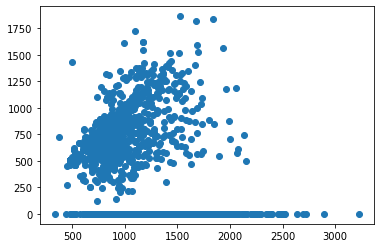

In [340]:
# Look at '1st Flr SF' and '2nd Flr SF'
plt.scatter(dum_houses['1st Flr SF'], dum_houses['2nd Flr SF']);

In [341]:
# Find intercept of the model (final_mod)
final_mod.intercept_

6.053497168843664

In [342]:
# Find coefficients of 4 added columns that are included in the model (final_mod)
list(zip(final_mod.coef_, final_features))

[(0.02937703041257145, 'neighborhood_StoneBr'),
 (0.044589512845860206, 'neighborhood_NridgHt'),
 (-0.054315319543848745, 'zone_RM'),
 (-0.23711206066880522, 'has_garage'),
 (5.87983201160284e-06, 'Lot Area'),
 (0.07734757562061483, 'Overall Qual'),
 (0.0003967528706519232, 'Year Built'),
 (0.0017722231835890466, 'Year Remod/Add'),
 (0.022250963253771714, 'Exter Qual'),
 (0.009766311913548759, 'Bsmt Qual'),
 (0.012916193174257446, 'Bsmt Exposure'),
 (-7.627632255751211e-05, 'Bsmt Unf SF'),
 (0.00015256376021058847, 'Total Bsmt SF'),
 (0.0204122686710853, 'Heating QC'),
 (0.10029012918772781, 'Central Air'),
 (0.0002754065092167658, '1st Flr SF'),
 (0.00025533026243337566, '2nd Flr SF'),
 (0.023707050934677478, 'Bsmt Full Bath'),
 (0.03398460260198758, 'Kitchen Qual'),
 (0.01026538133156345, 'Fireplace Qu'),
 (0.01833545293380528, 'Garage Cars'),
 (0.09491740605956732, 'Garage Cond'),
 (0.10449777841028458, 'Paved Drive')]

In [343]:
# Find percentage of houses that are in 'zone_RM'
dum_houses['zone_RM'].mean()

0.15347018572825025

In [344]:
# Find percentage of houses that are in 'neighborhood_StoneBr'
dum_houses['neighborhood_StoneBr'].mean()

0.01857282502443793

In [345]:
# Find percentage of houses that are in 'neighborhood_NridgHt'
dum_houses['neighborhood_NridgHt'].mean()

0.059628543499511244

In [346]:
# Find percentage of houses that are in 'has_garage'
dum_houses['has_garage'].mean()

0.944770283479961

In [347]:
# Look at relationship between high lot areas and actual/predicted sal price
dum_houses.groupby('Lot Area')['SalePrice', 'SalePrice_preds'].mean().tail()

SalePrice  SalePrice_preds
Lot Area                            
53504      538000.0    602011.169526
57200      160000.0    181483.212390
70761      280000.0    279942.050356
115149     302000.0    444341.621733
159000     277000.0    559412.226076

In [348]:
# Look at relationship between Bsmt Unf SF and Lot Area, actual/predicted sale price
dum_houses.groupby('Bsmt Unf SF')['Lot Area', 'SalePrice', 'SalePrice_preds'].mean()


Lot Area      SalePrice  SalePrice_preds
Bsmt Unf SF                                              
0.0           9990.585366  142833.554878    142304.734568
15.0         21384.000000  223500.000000    215443.900347
17.0         12864.000000  245000.000000    226112.310653
20.0          8425.000000  119900.000000    132629.892249
23.0          6225.000000  145000.000000    138069.140998
...                   ...            ...              ...
2062.0       13108.000000  270000.000000    311784.255908
2121.0       14450.000000  415298.000000    369703.918358
2140.0       10481.000000  360000.000000    281530.312102
2153.0       13693.000000  380000.000000    409584.837264
2336.0       13472.000000  386250.000000    436990.835516

[965 rows x 3 columns]

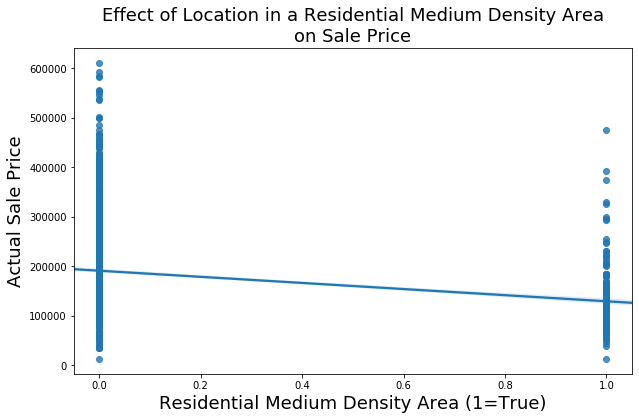

In [349]:
# Create scatterplots for 4 added columns that appear in final_features vs. sale price
plt.figure(figsize=(10,6))
sns.regplot(dum_houses['zone_RM'], dum_houses['SalePrice'])
plt.title('Effect of Location in a Residential Medium Density Area\non Sale Price', size=18)
plt.xlabel('Residential Medium Density Area (1=True)', size=18)
plt.ylabel('Actual Sale Price', size=18);

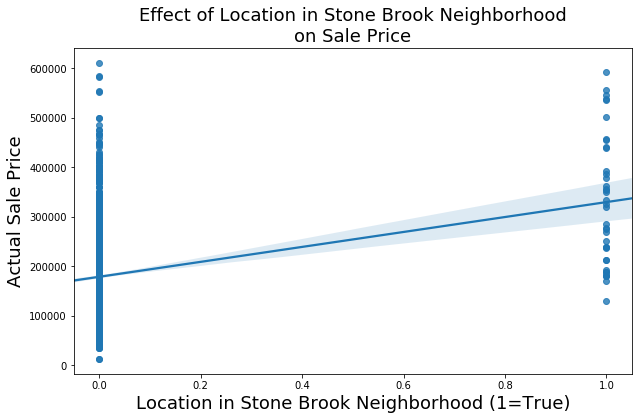

In [350]:
plt.figure(figsize=(10,6))
sns.regplot(dum_houses['neighborhood_StoneBr'], dum_houses['SalePrice'])
plt.title('Effect of Location in Stone Brook Neighborhood\non Sale Price', size=18)
plt.xlabel('Location in Stone Brook Neighborhood (1=True)', size=18)
plt.ylabel('Actual Sale Price', size=18);

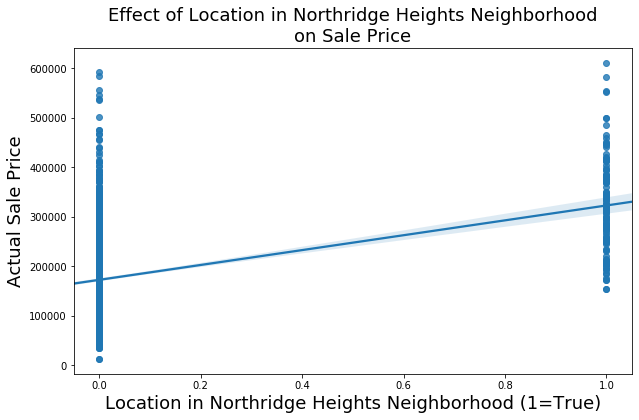

In [351]:
plt.figure(figsize=(10,6))
sns.regplot(dum_houses['neighborhood_NridgHt'], dum_houses['SalePrice'])
plt.title('Effect of Location in Northridge Heights Neighborhood\non Sale Price', size=18)
plt.xlabel('Location in Northridge Heights Neighborhood (1=True)', size=18)
plt.ylabel('Actual Sale Price', size=18);

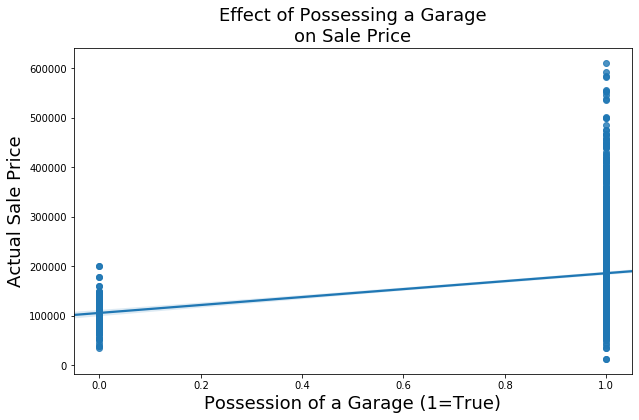

In [352]:
plt.figure(figsize=(10,6))
sns.regplot(dum_houses['has_garage'], dum_houses['SalePrice'])
plt.title('Effect of Possessing a Garage\non Sale Price', size=18)
plt.xlabel('Possession of a Garage (1=True)', size=18)
plt.ylabel('Actual Sale Price', size=18);

In [353]:
# Find p-values of all variables in an OLS summary again
X = dum_houses[final_features]
X = sm.add_constant(X)
y = np.log(dum_houses['SalePrice'])
model = sm.OLS(y, X).fit()
model.summary()

/Users/kelly/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     763.7
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:13:44   Log-Likelihood:                 1238.1
No. Observations:                2046   AIC:                            -2428.
Df Residuals:                    2022   BIC:                            -2293.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.3523      0.454     14.006      0.000       5.463       7.242
neighborhood_StoneBr     0.0464      0.023      2.035      0.042       0.002       0.091
neighborhood_NridgHt     0.0368      0.014      2.569      0.010       0.009       0.065
zone_RM                 -0.0702      0.009     -7.484      0.000      -0.089      -0.052
has_garage              -0.2249      0.044     -5.091      0.000      -0.312      -0.138
Lot Area               4.05e-06   5.07e-07      7.992      0.000    3.06e-06    5.04e-06
Overall Qual             0.0759      0.004     18.756      0.000       0.068       0.084
Year Built               0.0003      0.000      2.019      0.044    9.95e-06       0.001
Year Remod/Add           0.0017      0.000      7.817      0.000       0.001       0.002
Exter Qual               0.0203      0.009      2.266      0.024       0.003       0.038
Bsmt Qual                0.0111      0.006      1.926      0.054      -0.000       0.022
Bsmt Exposure            0.0136      0.003      4.103      0.000       0.007       0.020
Bsmt Unf SF          -8.294e-05   9.92e-06     -8.357      0.000      -0.000   -6.35e-05
Total Bsmt SF            0.0002   1.66e-05      9.577      0.000       0.000       0.000
Heating QC               0.0245      0.004      6.173      0.000       0.017       0.032
Central Air              0.0978      0.014      7.168      0.000       0.071       0.125
1st Flr SF               0.0003   1.65e-05     16.703      0.000       0.000       0.000
2nd Flr SF               0.0002   9.03e-06     27.668      0.000       0.000       0.000
Bsmt Full Bath           0.0193      0.008      2.460      0.014       0.004       0.035
Kitchen Qual             0.0323      0.007      4.450      0.000       0.018       0.047
Fireplace Qu             0.0123      0.002      6.129      0.000       0.008       0.016
Garage Cars              0.0265      0.006      4.110      0.000       0.014       0.039
Garage Cond              0.0922      0.014      6.420      0.000       0.064       0.120
Paved Drive              0.0834      0.014      6.079      0.000       0.057       0.110
==============================================================================
Omnibus:                     1082.200   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26444.155
Skew:                          -1.972   Prob(JB):                         0.00
Kurtosis:                      20.165   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity

In [354]:
# Exponentiate coefficients (e^coef) for four feature engineered values
sorted(list(zip(np.exp(ss_mlr.coef_), final_features)))

[(0.9474841305558132, 'has_garage'),
 (0.9664567149898043, 'Bsmt Unf SF'),
 (0.981037301091931, 'zone_RM'),
 (1.0038704382609578, 'neighborhood_StoneBr'),
 (1.008966377199067, 'Bsmt Qual'),
 (1.0103667519675859, 'neighborhood_NridgHt'),
 (1.012000938670888, 'Year Built'),
 (1.0124352961805696, 'Bsmt Full Bath'),
 (1.0131751297665959, 'Exter Qual'),
 (1.0140154208117036, 'Bsmt Exposure'),
 (1.0141038427896842, 'Garage Cars'),
 (1.0187431357417815, 'Fireplace Qu'),
 (1.0198182776441351, 'Heating QC'),
 (1.0229299148421513, 'Kitchen Qual'),
 (1.0244672206094485, 'Central Air'),
 (1.0281571680642883, 'Paved Drive'),
 (1.0306410058522883, 'Lot Area'),
 (1.037570258407915, 'Year Remod/Add'),
 (1.0673052010608042, 'Total Bsmt SF'),
 (1.0699356314629813, 'Garage Cond'),
 (1.1089971971756412, '1st Flr SF'),
 (1.1157560561493503, '2nd Flr SF'),
 (1.1170882490923517, 'Overall Qual')]

# Export clean train data with dummies

In [355]:
dum_houses.to_csv('./datasets/train_final.csv', index=False)

In [356]:
dum_houses.shape

(2046, 148)

# Conclusions and Recommendations

After evaluating the data, features, limitations, and median error rate of four of the most popular AVMs on the market, it became clear that there are three major items that would enhance this model for the Ames Housing Market 2006-2010:

1. Better data (i.e. market conditions, location-specific criteria such as schools, crime rates, proximity to public transport and stores, etc.)
2. Neighborhood-specific models (all AVMs analyzed use some sort of model comparing house sale prices in similar areas and determining weight of different features based on location)
3. Expertise knowledge (as a data scientist, I can interpret the significance of the numbers and make inferences, but, as mentioned above, real estate and property appraisal are incredibly nuanced)

In addition, I make four recommendations going forward for anyone hoping to create an AVM / property value estimator, as illustrated in my process below:

1. Simplicity is key for generalization
2. Determine if outliers are part of “irreducible error” noise or the “Joe Biden Effect”
3. A good model starts with good data
4. In real estate, nuance is key

In conclusion, the models built in this notebook illustrate a process of data cleaning, EDA, data visualization, and model tuning that led me to draw the conlusions above. The final model that is used for comparison with larger AVMs uses 23 features, 4 engineered in this project to filter for predictive categories and reflect real-life predictors' interactions. However, without more comprehensive data and more nuanced models informed by expertise knowledge, any sale price predictions will be more for interest than practical market use.

# Data Dictionary

In [357]:
# Create a data dictionary for new columns
# Credits (using .dtype.name): https://www.geeksforgeeks.org/python-pandas-series-dtype/
data_dict = {'variable': [], 'type': [], 'description': [], 'component columns': []}

for col in dum_houses.columns:
    if col not in houses.columns:
        data_dict['variable'].append(col)
        data_dict['type'].append(dum_houses[col].dtype.name)
    else: 
        pass
    
data_dict

{'variable': ['zone_C (all)',
  'zone_FV',
  'zone_I (all)',
  'zone_RH',
  'zone_RL',
  'zone_RM',
  'lot_config_CulDSac',
  'lot_config_FR2',
  'lot_config_FR3',
  'lot_config_Inside',
  'neighborhood_Blueste',
  'neighborhood_BrDale',
  'neighborhood_BrkSide',
  'neighborhood_ClearCr',
  'neighborhood_CollgCr',
  'neighborhood_Crawfor',
  'neighborhood_Edwards',
  'neighborhood_Gilbert',
  'neighborhood_Greens',
  'neighborhood_GrnHill',
  'neighborhood_IDOTRR',
  'neighborhood_Landmrk',
  'neighborhood_MeadowV',
  'neighborhood_Mitchel',
  'neighborhood_NAmes',
  'neighborhood_NPkVill',
  'neighborhood_NWAmes',
  'neighborhood_NoRidge',
  'neighborhood_NridgHt',
  'neighborhood_OldTown',
  'neighborhood_SWISU',
  'neighborhood_Sawyer',
  'neighborhood_SawyerW',
  'neighborhood_Somerst',
  'neighborhood_StoneBr',
  'neighborhood_Timber',
  'neighborhood_Veenker',
  'bldg_type_2fmCon',
  'bldg_type_Duplex',
  'bldg_type_Twnhs',
  'bldg_type_TwnhsE',
  'total_full_bath',
  'total_half

In [358]:
# Descriptions & component columns for dummy columns
for col in data_dict['variable']:
    if ('zone' in col) and ('lot_area' not in col):
        data_dict['description'].append("Dummy for 'MS Zoning'")
        data_dict['component columns'].append('MS Zoning')

In [359]:
for col in data_dict['variable']:
    if 'lot_config' in col:
        data_dict['description'].append("Dummy for 'Lot Config'")
        data_dict['component columns'].append('Lot Config')

In [360]:
for col in data_dict['variable']:
    if 'neighborhood' in col:
        data_dict['description'].append("Dummy for 'Neighborhood'")
        data_dict['component columns'].append('Neighborhood')

In [361]:
for col in data_dict['variable']:
    if ('bldg_type' in col) and ('house_style' not in col):
        data_dict['description'].append("Dummy for 'Bldg Type'")
        data_dict['component columns'].append('Bldg Type')

In [362]:
# Description and component columns for calculated columns and interaction terms
data_dict['description'].append("Added 'Full Bath' and 'Bsmt Full Bath'")
data_dict['component columns'].append("'Full Bath', 'Bsmt Full Bath'")

data_dict['description'].append("Added 'Half Bath' and 'Bsmt Half Bath'")
data_dict['component columns'].append("'Half Bath', 'Bsmt Half Bath'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Lot Area', 'Lot Frontage'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Year Built', 'Year Remod/Add'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'TotRmsAbvGrd', 'Gr Liv Area'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Full Bath', 'Half Bath'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Garage Cars', 'Garage Area'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Garage Cond', 'Garage Qual'")

data_dict['description'].append("Made 'Condition1' and 'Condition2' binary, then added for [0,1,2]")
data_dict['component columns'].append("'Condition1', 'Condition2'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'BsmtFin SF 1', 'Total Bsmt SF'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'total_full_bath', 'Bedroom AbvGr'")

data_dict['description'].append("Interaction term")
data_dict['component columns'].append("'Functional', 'Overall Qual'")


In [363]:
# Description and component columns for interaction terms using dummies
for col in data_dict['variable']:
    if 'lot_area_zone' in col:
        data_dict['description'].append("Interaction term")
        data_dict['component columns'].append("'Lot Area' and 'MS Zoning' dummies")

In [364]:
for col in data_dict['variable']:
    if 'house_style_bldg_type' in col:
        data_dict['description'].append("Interaction term")
        data_dict['component columns'].append("'House Style' and 'Bldg Type' dummies")

In [365]:
# Description and component columns for interaction terms for model results
data_dict['description'].append("Sale Price predictions from most accurate model")
data_dict['component columns'].append("All features in final_features")

data_dict['description'].append("Actual sale prices - predicted sale prices (errors)']")
data_dict['component columns'].append("'SalePrice', 'SalePrice_preds'")


In [366]:
# Turn data dictionary into DataFrame
df_data_dict = pd.DataFrame(data_dict)

In [367]:
# Export data dictionary
df_data_dict.to_csv('./datasets/data_dictionary')

# Conclusions and Recommendations

After evaluating the data, features, limitations, and median error rate of four of the most popular AVMs on the market, it became clear that there are three major items that would enhance this model for the Ames Housing Market 2006-2010:

1. Better data (i.e. market conditions, location-specific criteria such as schools, crime rates, proximity to public transport and stores, etc.)
2. Neighborhood-specific models (all AVMs analyzed use some sort of model comparing house sale prices in similar areas and determining weight of different features based on location)
3. Expertise knowledge (as a data scientist, I can interpret the significance of the numbers and make inferences, but, as mentioned above, real estate and property appraisal are incredibly nuanced)

In addition, I make four recommendations going forward for anyone hoping to create an AVM / property value estimator, as illustrated in my process below:

1. Simplicity is key for generalization
2. Determine if outliers are part of “irreducible error” noise or the “Joe Biden Effect”
3. A good model starts with good data
4. In real estate, nuance is key

In conclusion, the models built in this notebook illustrate a process of data cleaning, EDA, data visualization, and model tuning that led me to draw the conlusions above. The final model that is used for comparison with larger AVMs uses 23 features, 4 engineered in this project to filter for predictive categories and reflect real-life predictors' interactions. However, without more comprehensive data and more nuanced models informed by expertise knowledge, any sale price predictions will be more for interest than practical market use.